In [1]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
%matplotlib inline

genome_score = pd.read_csv('./ml-latest/genome-scores.csv')
links = pd.read_csv('./ml-latest/links.csv')
ratings = pd.read_csv('./ml-latest/ratings.csv')
genome_tags = pd.read_csv('./ml-latest/genome-tags.csv')
movies = pd.read_csv("./ml-latest/movies.csv")
tags = pd.read_csv('./ml-latest/tags.csv')
metadata = pd.read_csv('./the-movies-dataset/movies_metadata.csv')

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
metadata = metadata.drop([19730, 29503, 35587])
metadata.release_date = pd.to_datetime(metadata['release_date'], format='%Y-%m-%d', errors='ignore')
metadata.id = pd.to_numeric(metadata.id)

ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s')
ratings = pd.merge(ratings, links, on='movieId', how='left')
ratings_merged = pd.merge(ratings, metadata, left_on='tmdbId', right_on='id', how='left')
ratings_merged = ratings_merged[['userId', 'movieId', 'rating', 'timestamp', 'release_date', 'id', 'revenue', 'runtime', 'title', 'imdbId', 'tmdbId']]
ratings_merged = ratings_merged.dropna()

movies = pd.merge(movies, links, on='movieId')

***

In [3]:
before_released = ratings_merged[ratings_merged.release_date>ratings_merged.timestamp]
before_released_count = before_released.groupby('movieId').count()

公開前に50回以上評価された映画のratingは以下。

In [4]:
before_released[before_released['movieId'].isin(list(before_released_count[before_released_count.userId>50].index))].groupby('movieId').mean()

userId    rating        id       revenue  runtime     imdbId
movieId                                                                     
605      131156.903846  4.153846    7300.0  9.752955e+07    108.0   117247.0
608      124443.200000  4.654545     275.0  6.061198e+07     98.0   116282.0
673      146692.865248  3.851064    2300.0  2.502000e+08     88.0   117705.0
692      147402.152941  2.670588   29621.0  0.000000e+00     94.0   117688.0
747      145522.572193  3.454545   16299.0  0.000000e+00     94.0   117768.0
835      131939.125000  3.097222   18555.0  2.582630e+05    102.0   116353.0
895      126705.276923  2.976923   79782.0  0.000000e+00    110.0   105729.0
981      150327.695652  2.782609   52855.0  3.028094e+06     95.0   118927.0
1445     143699.623188  3.333333   14908.0  4.529843e+06    108.0   119640.0
2028     124590.160714  4.196429     857.0  4.818409e+08    169.0   120815.0
2059     132793.750000  2.767857    9820.0  0.000000e+00    127.0   120783.0
2107     140158.763636  2.472727   11675.0  5.504174e+07     86.0   120694.0
2679     141187.186441  2.737288   84198.0  0.000000e+00     84.0   124555.0
2891     135511.450549  3.487179   24066.0  1.943649e+06     98.0   162360.0
2894     131022.577068  2.786654  171982.0  0.000000e+00     27.0   194314.0
4249     123596.936709  2.329114  136558.0  0.000000e+00     88.0   246002.0
4484     132353.043290  3.692641  110428.0  1.158600e+05     95.0    94828.0
5485     126522.388889  3.375000   39141.0  2.891288e+06     78.0   271219.0
5527     145078.337349  3.337349   30072.0  1.011373e+07    102.0   256276.0
44864    131208.726316  3.263158    8998.0  1.336844e+07     88.0   436331.0
45440    144406.336842  3.015789    9786.0  0.000000e+00    102.0   364955.0
53953    119954.450980  3.411765    3021.0  9.467960e+07    104.0   450385.0
63189    123594.984127  3.222222   16166.0  0.000000e+00     85.0  1124394.0
122886   138113.320359  3.965569  140607.0  2.068224e+09    136.0  2488496.0
122896   129725.779221  3.581169  166426.0  7.941920e+08    129.0  1790809.0
122916   124510.811321  3.688679  284053.0  0.000000e+00      0.0  3501632.0
135133   137391.341463  3.554878  131634.0  6.534283e+08    137.0  1951266.0
135567   129672.668539  3.629213   47933.0  3.896819e+08    120.0  1628841.0

公開前に50回以上評価されている映画のrating(全データ)

In [5]:
ratings_merged[ratings_merged['movieId'].isin(list(before_released_count[before_released_count.userId>50].index))].groupby('movieId').mean()

userId    rating        id       revenue  runtime     imdbId
movieId                                                                     
605      135614.765185  3.308572    7300.0  9.752955e+07    108.0   117247.0
608      135636.363609  4.105347     275.0  6.061198e+07     98.0   116282.0
673      134851.159264  2.754478    2300.0  2.502000e+08     88.0   117705.0
692      134519.616352  2.340671   29621.0  0.000000e+00     94.0   117688.0
747      135465.869565  2.344842   16299.0  0.000000e+00     94.0   117768.0
835      135326.072957  3.190661   18555.0  2.582630e+05    102.0   116353.0
895      130700.746269  2.977612   79782.0  0.000000e+00    110.0   105729.0
981      142085.318966  2.640086   52855.0  3.028094e+06     95.0   118927.0
1445     138086.821530  2.326133   14908.0  4.529843e+06    108.0   119640.0
2028     135595.130528  4.053711     857.0  4.818409e+08    169.0   120815.0
2059     134973.913289  3.211373    9820.0  0.000000e+00    127.0   120783.0
2107     135001.218553  2.533608   11675.0  5.504174e+07     86.0   120694.0
2679     138674.868852  2.713115   84198.0  0.000000e+00     84.0   124555.0
2891     132644.252072  3.378453   24066.0  1.943649e+06     98.0   162360.0
2894     131445.785461  2.789007  171982.0  0.000000e+00     27.0   194314.0
4249     124095.593023  2.296512  136558.0  0.000000e+00     88.0   246002.0
4484     133015.340996  3.668582  110428.0  1.158600e+05     95.0    94828.0
5485     137852.759766  3.270508   39141.0  2.891288e+06     78.0   271219.0
5527     138201.210366  3.335366   30072.0  1.011373e+07    102.0   256276.0
44864    136452.507273  3.035455    8998.0  1.336844e+07     88.0   436331.0
45440    133152.791513  3.109779    9786.0  0.000000e+00    102.0   364955.0
53953    134141.930313  3.338898    3021.0  9.467960e+07    104.0   450385.0
63189    136459.954839  3.241935   16166.0  0.000000e+00     85.0  1124394.0
122886   134446.460850  3.834501  140607.0  2.068224e+09    136.0  2488496.0
122896   138614.373016  3.371693  166426.0  7.941920e+08    129.0  1790809.0
122916   124510.811321  3.688679  284053.0  0.000000e+00      0.0  3501632.0
135133   136396.951159  3.426738  131634.0  6.534283e+08    137.0  1951266.0
135567   131647.599407  2.916914   47933.0  3.896819e+08    120.0  1628841.0

 公開後の映画のratingは以下。

In [6]:
after_released = ratings_merged[ratings_merged.release_date<ratings_merged.timestamp]
after_released_count = after_released.groupby('movieId').count()
after_released[after_released['movieId'].isin(list(after_released_count[after_released_count.userId>50].index))].groupby('movieId').mean()

userId    rating        id       revenue  runtime     imdbId
movieId                                                                     
1        135121.043616  3.888157     862.0  3.735540e+08     81.0   114709.0
2        134877.953761  3.236953    8844.0  2.627972e+08    104.0   113497.0
3        136520.452733  3.175550   15602.0  0.000000e+00    101.0   113228.0
4        136249.536062  2.875713   31357.0  8.145216e+07    127.0   114885.0
5        135293.275855  3.079565   11862.0  7.657891e+07    106.0   113041.0
6        135444.238968  3.841764     949.0  1.874368e+08    170.0   113277.0
7        134685.315960  3.372105   11860.0  0.000000e+00    127.0   114319.0
8        135333.835634  3.129191   45325.0  0.000000e+00     97.0   112302.0
9        133741.574949  3.008365    9091.0  6.435017e+07    106.0   114576.0
10       134609.622426  3.431841     710.0  3.521940e+08    130.0   113189.0
11       135495.106444  3.660591    9087.0  1.078795e+08    106.0   112346.0
12       134161.555084  2.672179   12110.0  0.000000e+00     88.0   112896.0
13       135705.354189  3.326442   21032.0  1.134832e+07     78.0   112453.0
14       135223.612017  3.430807   10858.0  1.368176e+07    192.0   113987.0
15       135087.287040  2.727040    1408.0  1.001732e+07    119.0   112760.0
16       134862.371643  3.795511     524.0  1.161124e+08    178.0   112641.0
17       134813.329738  3.952227    4584.0  1.350000e+08    136.0   114388.0
18       136348.898358  3.409031       5.0  4.300000e+06     98.0   113101.0
19       134925.724641  2.633983    9273.0  2.123855e+08     90.0   112281.0
20       134107.089591  2.894071   11517.0  3.543111e+07    103.0   113845.0
21       134768.835568  3.572159    8012.0  1.151016e+08    105.0   113161.0
22       134457.386087  3.300608    1710.0  0.000000e+00    124.0   112722.0
23       135855.626147  3.157631    9691.0  3.030307e+07    132.0   112401.0
24       135899.308619  3.180375   12665.0  0.000000e+00    111.0   114168.0
25       135020.397660  3.667513     451.0  4.980000e+07    112.0   113627.0
26       136582.373011  3.614058   16420.0  0.000000e+00    123.0   114057.0
27       135462.635676  3.424865    9263.0  2.740000e+07    100.0   114011.0
28       135557.015597  4.039876   17015.0  0.000000e+00    104.0   114117.0
29       134368.532990  3.920885     902.0  1.738611e+06    108.0   112682.0
30       133848.644280  3.636900   37557.0  0.000000e+00    108.0   115012.0
...                ...       ...       ...           ...      ...        ...
168420   121573.779412  3.066176  408220.0  0.000000e+00     75.0  2494376.0
168498   133900.543011  2.822581  173897.0  3.122426e+08    107.0  2592614.0
168554   132740.315789  3.065789  414190.0  0.000000e+00     90.0  3171832.0
168612   129552.448352  3.326374  315837.0  1.698019e+08    107.0  1219827.0
168712   139153.057471  2.275862  341174.0  3.788275e+08    118.0  4465564.0
169670   129397.758621  3.043103  378018.0  0.000000e+00     90.0  4255304.0
169864   136498.983099  3.247887  395992.0  1.005418e+08    103.0  5442430.0
169900   147009.304878  3.054878  314095.0  8.574339e+06    140.0  1212428.0
169982   131566.550000  2.905556  305470.0  1.423372e+08    124.0  3717490.0
169984   131909.394578  3.051205  126889.0  2.323802e+08    122.0  2316204.0
169992   138802.015152  3.000000  334521.0  3.565109e+06     90.0  4158096.0
170357   135768.061728  3.783951  444705.0  0.000000e+00     67.0  6648926.0
170399   116044.960784  2.676471  417644.0  2.680015e+07    100.0   493405.0
170403   123637.592593  3.222222  353070.0  8.461854e+07     96.0  2568862.0
170629   132123.445783  3.367470  376134.0  0.000000e+00    102.0  5155780.0
170697   131461.808989  4.000000  400928.0  3.746104e+07    101.0  4481414.0
170705   139565.320423  4.394366  331214.0  0.000000e+00    705.0   185906.0
170729   137579.674157  3.702247  449674.0  0.000000e+00     74.0  6736782.0
170827   144597.846154  2.611111  282035.0  4.077780e+08    110.0  2345759.0
170875   132

公開前後での評価のカウント、平均、分散をみる

In [31]:
funcs = ['count', 'mean', 'std']

before_released_over50 = before_released[before_released['movieId'].isin(list(before_released_count[before_released_count.userId>50].index))].groupby('movieId').agg(funcs)
after_released_over50 = after_released[after_released['movieId'].isin(list(after_released_count[after_released_count.userId>50].index))].groupby('movieId').agg(funcs)
pd.merge(before_released_over50, after_released_over50, left_index=True, right_index=True)[['rating_x', 'rating_y']]

rating_x                     rating_y                    
           count      mean       std    count      mean       std
movieId                                                          
605           52  4.153846  1.177978     3751  3.296854  0.943003
608           55  4.654545  0.644584    52419  4.104771  0.919383
673          141  3.851064  0.977871    12310  2.741917  1.116046
692           85  2.670588  1.321869      869  2.308400  1.167853
747          187  3.454545  1.214526      986  2.134381  1.236478
835           72  3.097222  0.790074      956  3.197699  0.894213
981           69  2.782609  1.027126      163  2.579755  1.205602
1445          69  3.333333  1.244596     1343  2.274386  1.116079
2028          56  4.196429  1.016583    50753  4.053553  0.912446
2059          56  2.767857  1.361698     4015  3.217559  1.088305
2107          55  2.472727  1.463817     2489  2.534954  1.137274
2891         273  3.487179  0.974312     1175  3.353191  0.933443
4484         462  3.692641  0.796351       60  3.483333  0.786360
5485          72  3.375000  1.131340      440  3.253409  0.918669
5527          83  3.337349  0.940642      573  3.335079  0.897418
44864         95  3.263158  0.837429      455  2.987912  0.937101
45440         95  3.015789  0.730974      447  3.129754  0.913862
53953         51  3.411765  0.653497     3723  3.337900  0.940166
63189         63  3.222222  0.978716       92  3.255435  0.979164
122886       334  3.965569  1.144059     9947  3.830100  1.017090
122896       154  3.581169  1.267325      224  3.227679  1.154807
135133        82  3.554878  1.102763     2723  3.422879  1.087941
135567       178  3.629213  1.067041      833  2.764706  1.104178

x means "before release", y means "after release"
72

In [8]:
before_after_merged = pd.merge(before_released_over50, after_released_over50, left_index=True, right_index=True)

公開後に公開前より評価が0.5以上下がったもの

In [9]:
before_after_merged[before_after_merged.rating_x['mean']-before_after_merged.rating_y['mean']>0.5]

userId_x                              rating_x                      \
           count           mean           std    count      mean       std   
movieId                                                                      
605           52  131156.903846  70281.902111       52  4.153846  1.177978   
608           55  124443.200000  77043.593477       55  4.654545  0.644584   
673          141  146692.865248  83035.151545      141  3.851064  0.977871   
747          187  145522.572193  76207.071810      187  3.454545  1.214526   
1445          69  143699.623188  79393.292279       69  3.333333  1.244596   
135567       178  129672.668539  74546.878992      178  3.629213  1.067041   

         id_x               revenue_x ...  id_y revenue_y                    \
        count     mean  std     count ...   std     count         mean  std   
movieId                               ...                                     
605        52   7300.0  0.0        52 ...   0.0      3751   97529550.0  0.0   
608        55    275.0  0.0        55 ...   0.0     52419   60611975.0  0.0   
673       141   2300.0  0.0       141 ...   0.0     12310  250200000.0  0.0   
747       187  16299.0  0.0       187 ...   0.0       986          0.0  0.0   
1445       69  14908.0  0.0        69 ...   0.0      1343    4529843.0  0.0   
135567    178  47933.0  0.0       178 ...   0.0       833  389681935.0  0.0   

        runtime_y             imdbId_y                
            count   mean  std    count     mean  std  
movieId                                               
605          3751  108.0  0.0     3751   117247  0.0  
608         52419   98.0  0.0    52419   116282  0.0  
673         12310   88.0  0.0    12310   117705  0.0  
747           986   94.0  0.0      986   117768  0.0  
1445         1343  108.0  0.0     1343   119640  0.0  
135567        833  120.0  0.0      833  1628841  0.0  

[6 rows x 36 columns]

その逆は？

In [10]:
before_after_merged[before_after_merged.rating_y['mean']-before_after_merged.rating_x['mean']>0.5]

Empty DataFrame
Columns: [(userId_x, count), (userId_x, mean), (userId_x, std), (rating_x, count), (rating_x, mean), (rating_x, std), (id_x, count), (id_x, mean), (id_x, std), (revenue_x, count), (revenue_x, mean), (revenue_x, std), (runtime_x, count), (runtime_x, mean), (runtime_x, std), (imdbId_x, count), (imdbId_x, mean), (imdbId_x, std), (userId_y, count), (userId_y, mean), (userId_y, std), (rating_y, count), (rating_y, mean), (rating_y, std), (id_y, count), (id_y, mean), (id_y, std), (revenue_y, count), (revenue_y, mean), (revenue_y, std), (runtime_y, count), (runtime_y, mean), (runtime_y, std), (imdbId_y, count), (imdbId_y, mean), (imdbId_y, std)]
Index: []

[0 rows x 36 columns]

公開後に大幅に評価が上がることはないと思ってよさそう

In [11]:
before_after_merged[before_after_merged.rating_x['mean']>before_after_merged.rating_y['mean']].count()

userId_x   count    18
           mean     18
           std      18
rating_x   count    18
           mean     18
           std      18
id_x       count    18
           mean     18
           std      18
revenue_x  count    18
           mean     18
           std      18
runtime_x  count    18
           mean     18
           std      18
imdbId_x   count    18
           mean     18
           std      18
userId_y   count    18
           mean     18
           std      18
rating_y   count    18
           mean     18
           std      18
id_y       count    18
           mean     18
           std      18
revenue_y  count    18
           mean     18
           std      18
runtime_y  count    18
           mean     18
           std      18
imdbId_y   count    18
           mean     18
           std      18
dtype: int64

In [12]:
before_after_merged[before_after_merged.rating_x['mean']<before_after_merged.rating_y['mean']].count()

userId_x   count    5
           mean     5
           std      5
rating_x   count    5
           mean     5
           std      5
id_x       count    5
           mean     5
           std      5
revenue_x  count    5
           mean     5
           std      5
runtime_x  count    5
           mean     5
           std      5
imdbId_x   count    5
           mean     5
           std      5
userId_y   count    5
           mean     5
           std      5
rating_y   count    5
           mean     5
           std      5
id_y       count    5
           mean     5
           std      5
revenue_y  count    5
           mean     5
           std      5
runtime_y  count    5
           mean     5
           std      5
imdbId_y   count    5
           mean     5
           std      5
dtype: int64

***

## 公開後評価が下がった映画について

In [13]:
down_over05 = ratings_merged[ratings_merged['movieId'].isin(list(before_after_merged[before_after_merged.rating_x['mean']-before_after_merged.rating_y['mean']>0.5].index))]

In [14]:
down_over05.head()

userId  movieId  rating           timestamp release_date       id  \
37         2      605     4.0 1997-06-23 04:26:13   1996-12-20   7300.0   
705       12      608     5.0 1999-11-29 21:29:17   1996-04-05    275.0   
920       15      608     5.0 2012-08-26 19:31:02   1996-04-05    275.0   
1311      16   135567     4.0 2017-01-28 23:31:37   2016-06-22  47933.0   
1804      24      608     5.0 2001-01-19 02:05:12   1996-04-05    275.0   

          revenue  runtime                         title   imdbId tmdbId  
37     97529550.0    108.0                  One Fine Day   117247   7300  
705    60611975.0     98.0                         Fargo   116282    275  
920    60611975.0     98.0                         Fargo   116282    275  
1311  389681935.0    120.0  Independence Day: Resurgence  1628841  47933  
1804   60611975.0     98.0                         Fargo   116282    275

0.5点以上点が下がった映画のindexは以下

In [15]:
down_over05_movie_index = list(before_after_merged[before_after_merged.rating_x['mean']-before_after_merged.rating_y['mean']>0.5].index)

In [21]:
down_over05_movie_index

[605, 608, 673, 747, 1445, 135567]

In [16]:
down_over05[down_over05['movieId']==down_over05_movie_index[0]].sort_values('timestamp')

userId  movieId  rating           timestamp release_date      id  \
2923587    30453      605     1.0 1996-07-15 06:49:11   1996-12-20  7300.0   
7957192    81964      605     5.0 1996-08-14 09:57:53   1996-12-20  7300.0   
17284925  179399      605     5.0 1996-10-15 16:06:47   1996-12-20  7300.0   
11851664  122852      605     4.0 1996-10-17 12:00:42   1996-12-20  7300.0   
17783017  184498      605     4.0 1996-10-28 00:51:27   1996-12-20  7300.0   
16094246  167366      605     4.0 1996-11-03 13:28:14   1996-12-20  7300.0   
7353204    75773      605     4.0 1996-11-12 02:48:47   1996-12-20  7300.0   
24128475  250468      605     4.0 1996-11-25 20:49:09   1996-12-20  7300.0   
25179949  261906      605     4.0 1996-12-03 20:30:08   1996-12-20  7300.0   
3919316    40738      605     5.0 1996-12-05 16:52:46   1996-12-20  7300.0   
16938276  175971      605     4.0 1996-12-06 08:24:53   1996-12-20  7300.0   
23718721  246086      605     5.0 1996-12-06 09:33:45   1996-12-20  7300.0   
20680750  214809      605     2.0 1996-12-06 10:28:45   1996-12-20  7300.0   
5196695    53538      605     5.0 1996-12-06 11:46:13   1996-12-20  7300.0   
8302141    85550      605     5.0 1996-12-06 15:57:58   1996-12-20  7300.0   
7054023    72782      605     3.0 1996-12-07 08:47:20   1996-12-20  7300.0   
9990309   102967      605     5.0 1996-12-07 20:59:38   1996-12-20  7300.0   
22394496  232298      605     5.0 1996-12-08 07:58:01   1996-12-20  7300.0   
13884163  144237      605     4.0 1996-12-09 12:36:05   1996-12-20  7300.0   
10028258  103423      605     5.0 1996-12-09 13:32:23   1996-12-20  7300.0   
3571727    37216      605     5.0 1996-12-10 09:29:23   1996-12-20  7300.0   
11648723  120811      605     3.0 1996-12-10 11:59:51   1996-12-20  7300.0   
6144293    63283      605     5.0 1996-12-10 13:09:19   1996-12-20  7300.0   
22214840  230479      605     5.0 1996-12-10 13:33:51   1996-12-20  7300.0   
4499371    46185      605     4.0 1996-12-11 07:28:51   1996-12-20  7300.0   
19403968  201387      605     5.0 1996-12-11 15:13:36   1996-12-20  7300.0   
14943902  155310      605     5.0 1996-12-11 16:00:00   1996-12-20  7300.0   
8477422    87245      605     2.0 1996-12-11 20:12:39   1996-12-20  7300.0   
10562828  109004      605     4.0 1996-12-12 08:51:42   1996-12-20  7300.0   
4716394    48477      605     5.0 1996-12-12 09:16:33   1996-12-20  7300.0   
...          ...      ...     ...                 ...          ...     ...   
19268826  200046      605     5.0 2017-02-27 16:37:12   1996-12-20  7300.0   
6141225    63253      605     4.0 2017-03-10 22:12:58   1996-12-20  7300.0   
13682296  142104      605     5.0 2017-03-17 22:27:39   1996-12-20  7300.0   
12001066  124325      605     1.5 2017-03-27 02:34:00   1996-12-20  7300.0   
7767209    80015      605     4.5 2017-03-27 16:15:54   1996-12-20  7300.0   
6539114    67466      605     3.5 2017-04-02 15:10:44   1996-12-20  7300.0   
13508582  140405      605     4.0 2017-04-06 09:30:52   1996-12-20  7300.0   
22301010  231406      605     1.0 2017-04-08 16:54:42   1996-12-20  7300.0   
1006862    10250      605     2.5 2017-04-16 14:59:35   1996-12-20  7300.0   
11670973  121031      605     3.5 2017-04-19 01:23:54   1996-12-20  7300.0   
16207727  168427      605     3.5 2017-04-27 17:43:32   1996-12-20  7300.0   
25794052  268315      605     3.5 2017-04-27 22:38:05   1996-12-20  7300.0   
24077978  249936      605     4.0 2017-04-29 21:05:02   1996-12-20  7300.0   
16168641  168095      605     4.5 2017-05-12 13:08:41   1996-12-20  7300.0   
21326633  221391      605     4.5 2017-05-12 18:14:19   1996-12-20  7300.0   
18400139  190907      605     3.5 2017-05-12 21:08:56   1996-12-20  7300.0   
7657875    79042      605     3.5 2017-05-14 10:55:56   1996-12-20  7300.0   
5769457    59433      605     1.5 2017-05-14 15:56:54   1996-12-20  7300.0   
21030744  218493      605     3.0 2017-05-15 22:35:45   1996-12-20  7300.0   
11044716  114192      605     3.

In [17]:
for_plot = down_over05[down_over05['movieId']==down_over05_movie_index[0]].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')

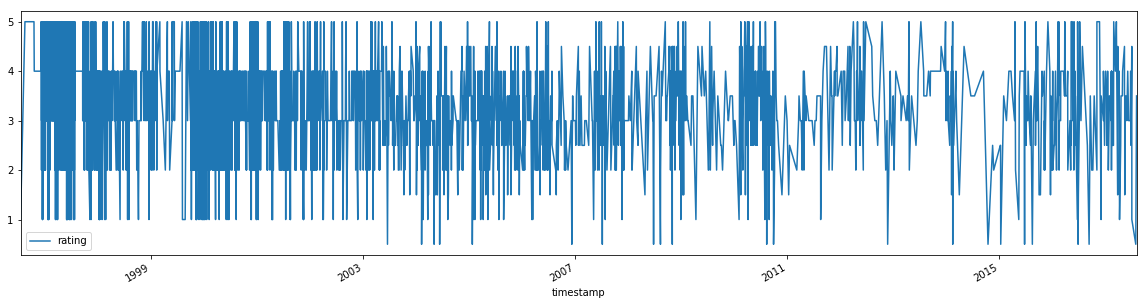

In [22]:
figsize(20, 5)
for_plot.plot()

1週間の平均を窓にしてプロットすると以下

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=7).mean()
  if __name__ == '__main__':


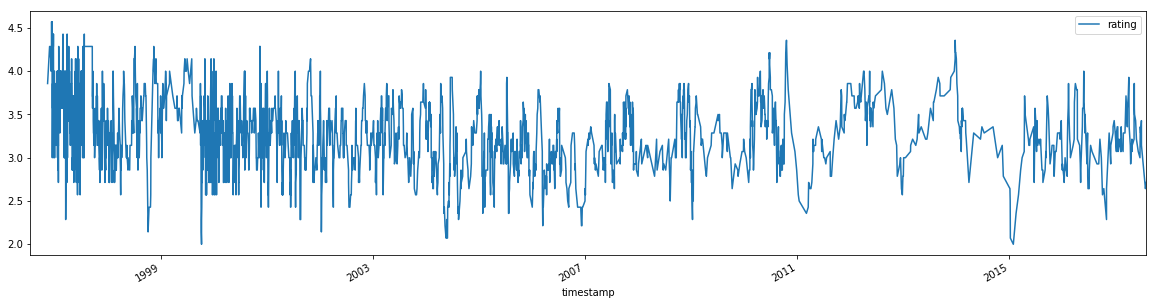

In [23]:
pd.rolling_mean(for_plot, 7).plot()

公開後に下がったというより、2000年代あたりから下がってる

1年間でプロット

残りについてもプロット

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=50).mean()


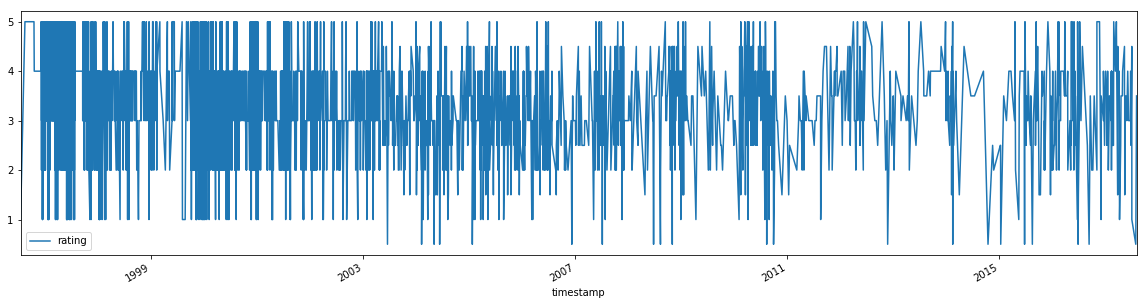

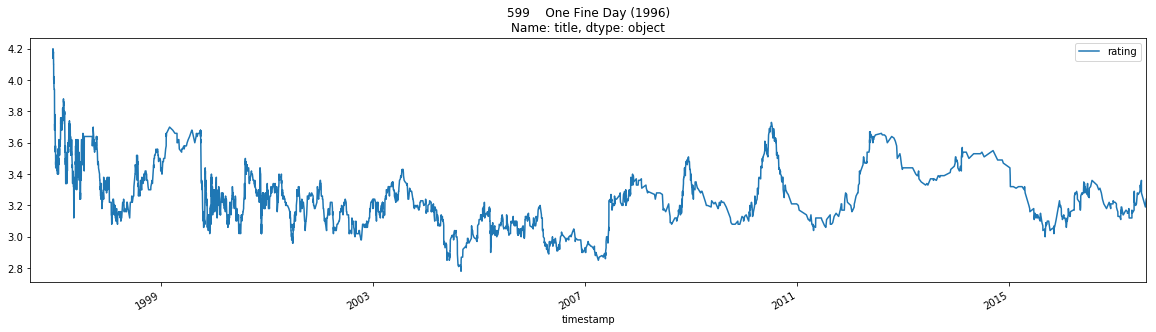

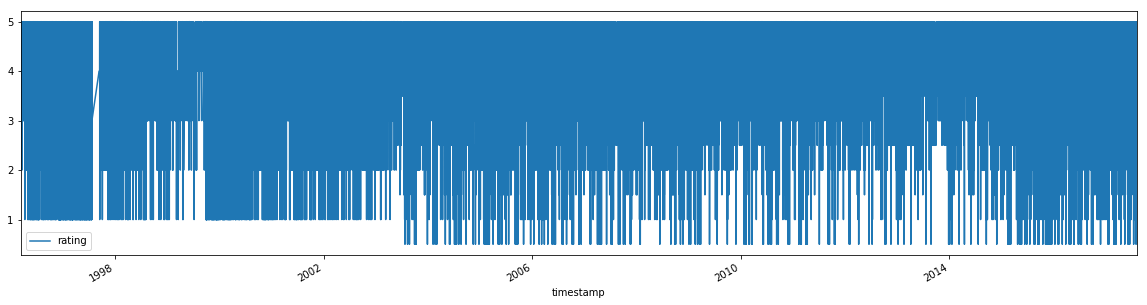

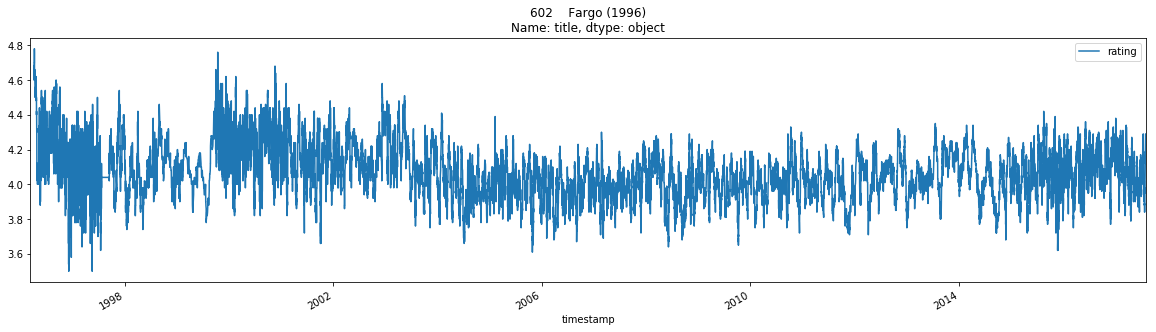

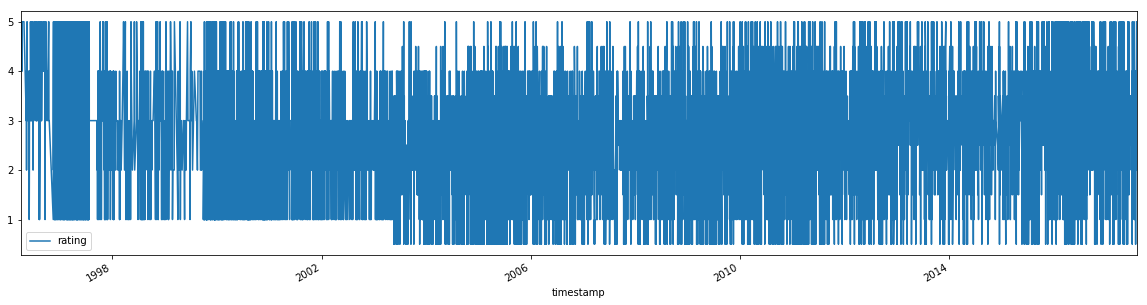

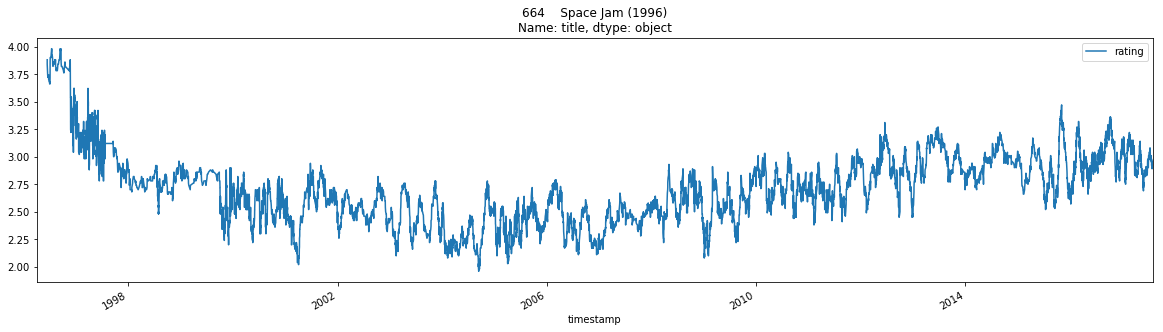

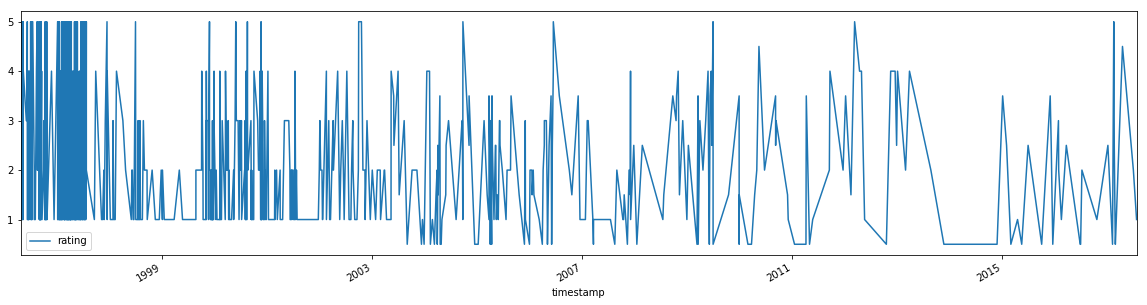

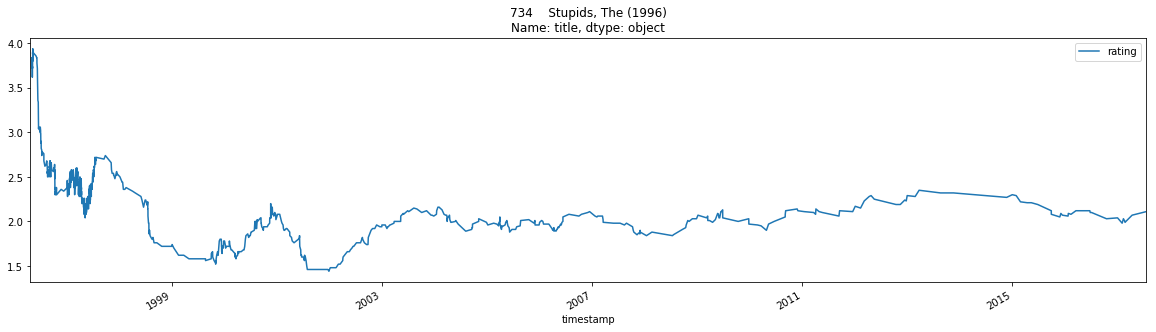

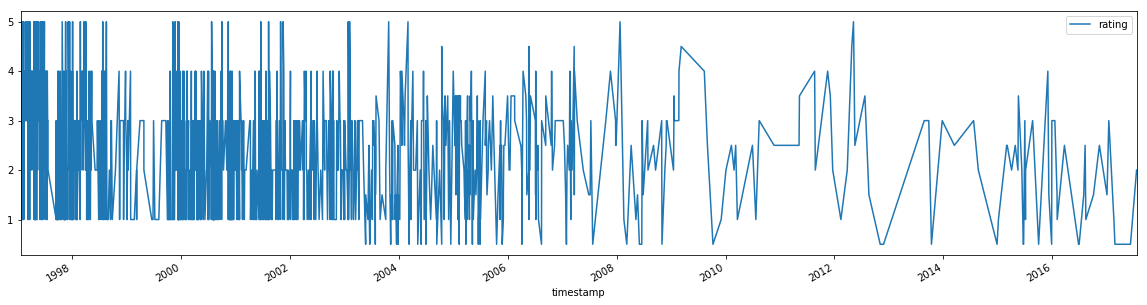

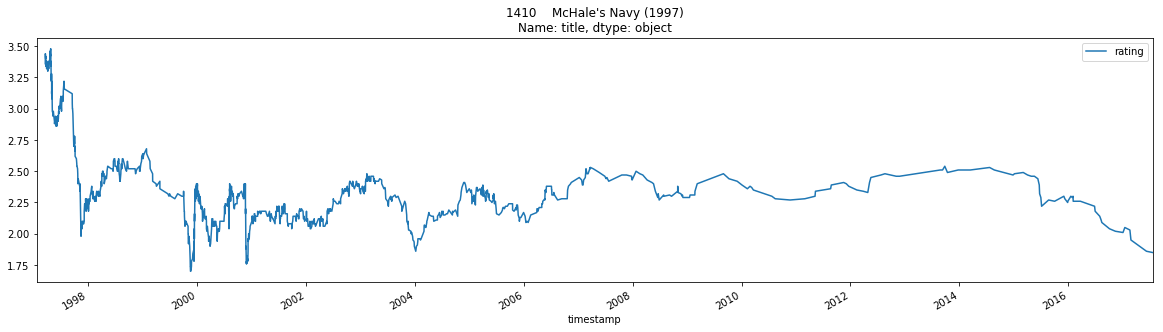

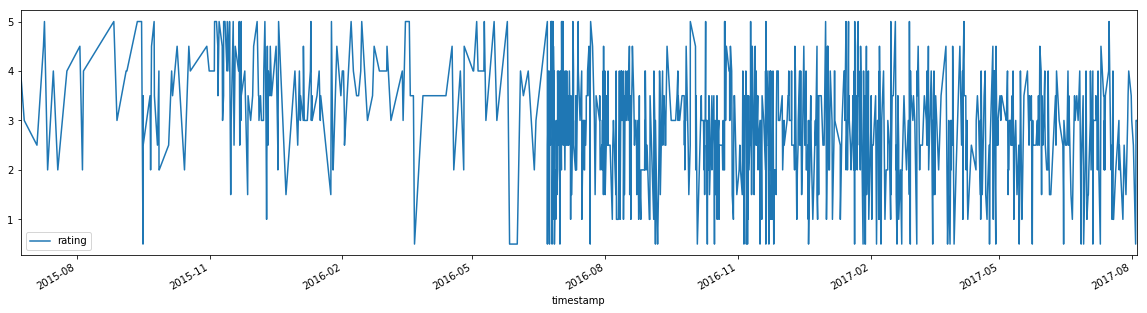

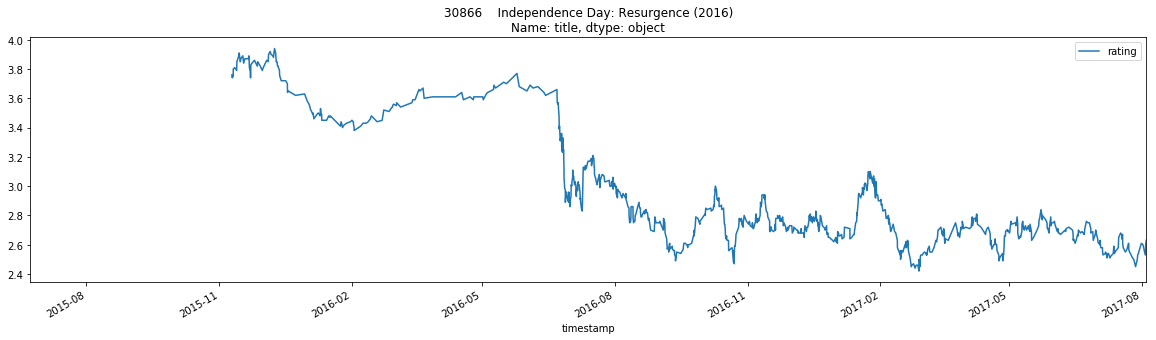

In [78]:
for i in range(len(down_over05_movie_index)):
    down_over05[down_over05['movieId']==down_over05_movie_index[i]].sort_values('timestamp')
    for_plot = down_over05[down_over05['movieId']==down_over05_movie_index[i]].sort_values('timestamp')[['timestamp', 'rating']]
    for_plot = for_plot.set_index('timestamp')
    for_plot.plot()
    pd.rolling_mean(for_plot, 50).plot(title=str(movies[movies.movieId==down_over05_movie_index[i]].title))

## 予算に対して興行収入が異常に低かった映画

The Adventures of Pluto Nash

※本作には1億ドルの製作費がかけられたが、全世界での興行収入はその1割にも満たない約710万ドルである[1]。2009年に『ハリウッド・リポーター』誌は「この10年で最大の失敗作」と報じた  
※ゴールデンラズベリー賞

In [25]:
metadata[metadata.index==5389]

adult belongs_to_collection     budget  \
5389  False                   NaN  100000000   

                                                 genres homepage     id  \
5389  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...      NaN  11692   

        imdb_id original_language                original_title  \
5389  tt0180052                en  The Adventures of Pluto Nash   

                                               overview    ...      \
5389  The year is 2087, the setting is the moon. Plu...    ...       

     release_date    revenue runtime  \
5389   2002-08-15  7103973.0    95.0   

                              spoken_languages    status  \
5389  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                             tagline                         title  video  \
5389  Action's future has arrived...  The Adventures of Pluto Nash  False   

     vote_average vote_count  
5389          4.4      143.0  

[1 rows x 24 columns]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=50).mean()


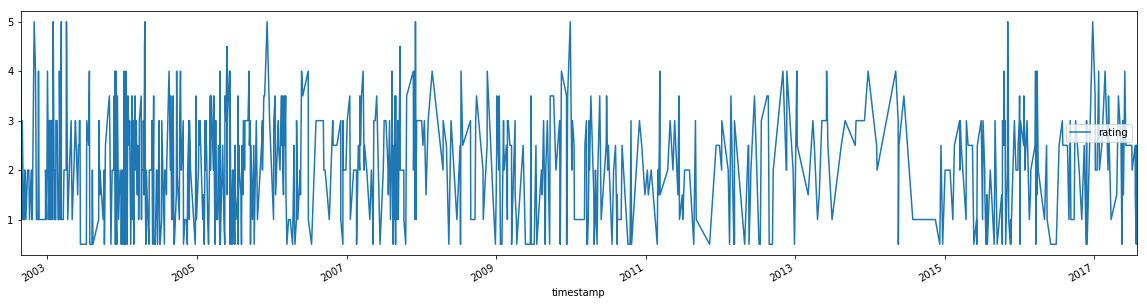

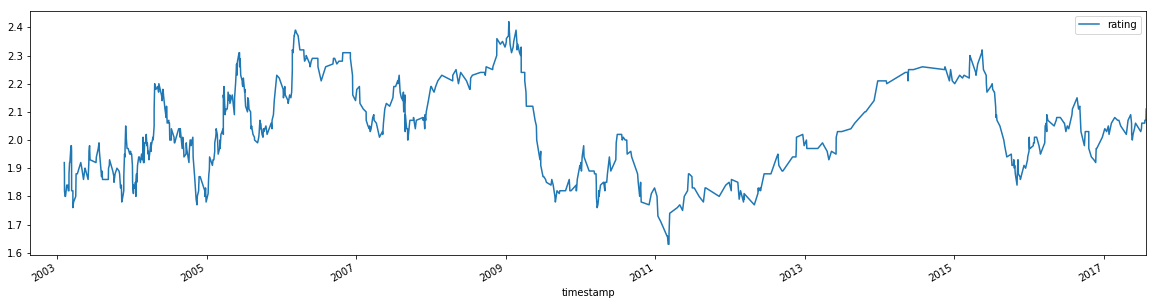

In [50]:
for_plot = ratings[ratings.tmdbId==11692].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')
for_plot.plot()
pd.rolling_mean(for_plot, 50).plot()

In [40]:
metadata[metadata.id==57201]

adult belongs_to_collection     budget  \
21175  False                   NaN  255000000   

                                                  genres  \
21175  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                    homepage     id    imdb_id  \
21175  http://disney.go.com/the-lone-ranger/  57201  tt1210819   

      original_language   original_title  \
21175                en  The Lone Ranger   

                                                overview    ...      \
21175  The Texas Rangers chase down a gang of outlaws...    ...       

      release_date     revenue runtime  \
21175   2013-07-03  89289910.0   149.0   

                               spoken_languages    status  \
21175  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                       tagline            title  video vote_average vote_count  
21175  Never Take Off the Mask  The Lone Ranger  False          5.9     2361.0  

[1 rows x 24 columns]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=50).mean()


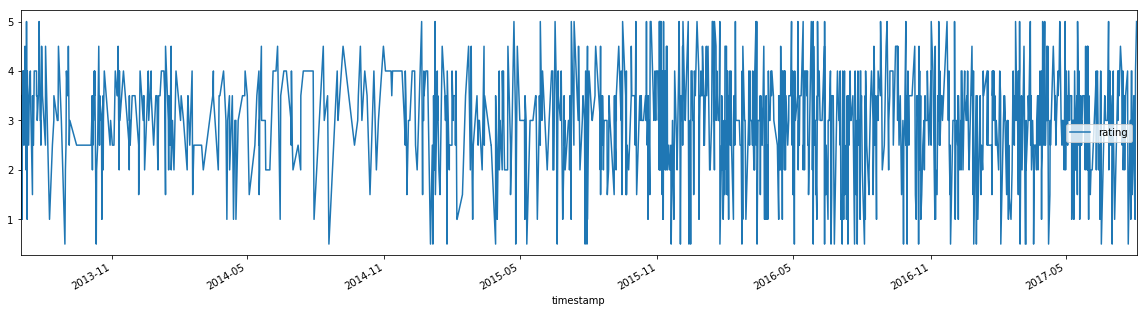

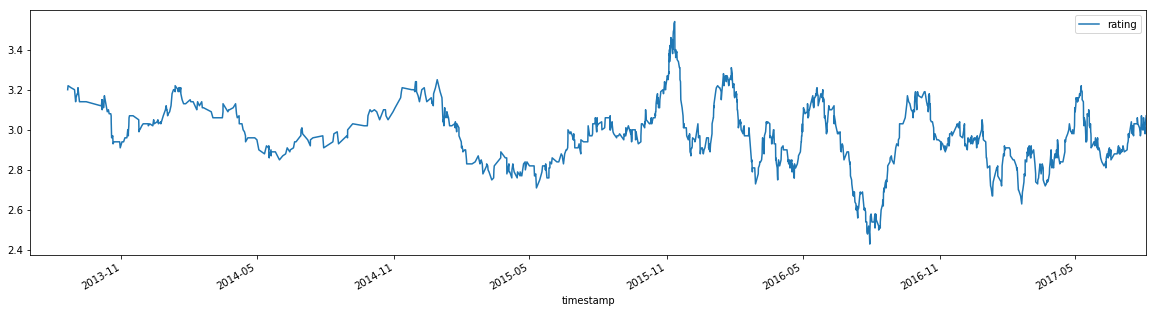

In [51]:
n=57201

for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')
for_plot.plot()
pd.rolling_mean(for_plot, 50).plot()

In [43]:
n=259695

metadata[metadata.id==n]

adult belongs_to_collection     budget  \
41491  False                   NaN  108000000   

                                                  genres  \
41491  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   

                            homepage      id    imdb_id original_language  \
41491  http://www.livebynight.movie/  259695  tt2361317                en   

      original_title                                           overview  \
41491  Live by Night  A story set in the Prohibition Era and centere...   

         ...     release_date     revenue runtime  \
41491    ...       2016-12-25  22678555.0   129.0   

                                        spoken_languages    status  \
41491  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   

                                        tagline          title  video  \
41491  Witness the price of the American Dream.  Live by Night  False   

      vote_average vote_count  
41491          6.2      416.0  

[1 rows x 24 columns]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=7).mean()


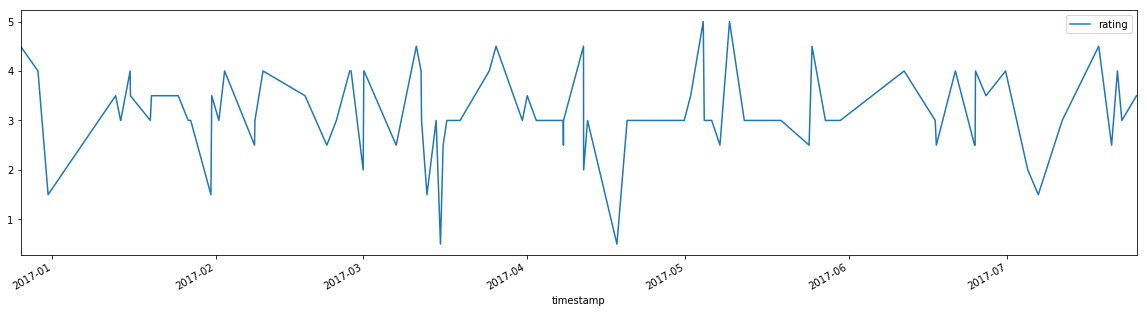

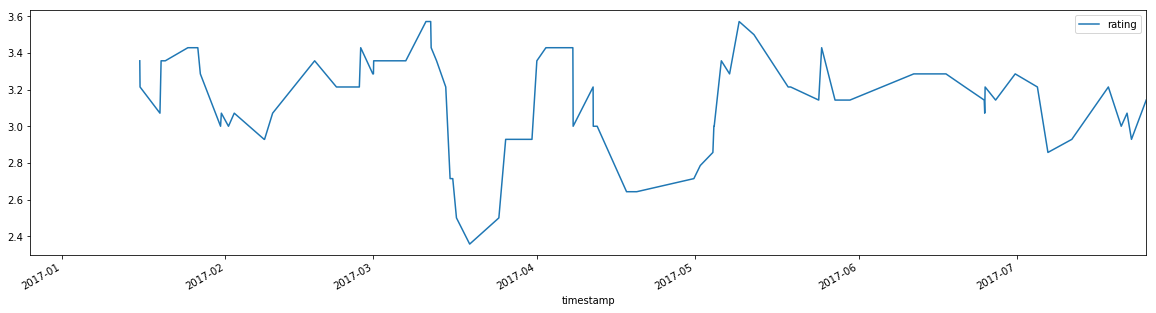

In [44]:
for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')
for_plot.plot()
pd.rolling_mean(for_plot, 7).plot()

予算に対して興行収入が低かった映画はそもそも評価数が少ない

## 興行収入が大きかった映画は

In [47]:
n = 19995

metadata[metadata.id==n]

adult                              belongs_to_collection     budget  \
14551  False  {'id': 87096, 'name': 'Avatar Collection', 'po...  237000000   

                                                  genres  \
14551  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                          homepage     id    imdb_id original_language  \
14551  http://www.avatarmovie.com/  19995  tt0499549                en   

      original_title                                           overview  \
14551         Avatar  In the 22nd century, a paraplegic Marine is di...   

         ...     release_date       revenue runtime  \
14551    ...       2009-12-10  2.787965e+09   162.0   

                                        spoken_languages    status  \
14551  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   

                           tagline   title  video vote_average vote_count  
14551  Enter the World of Pandora.  Avatar  False          7.2    12114.0  

[1 rows x 24 columns]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=50).mean()


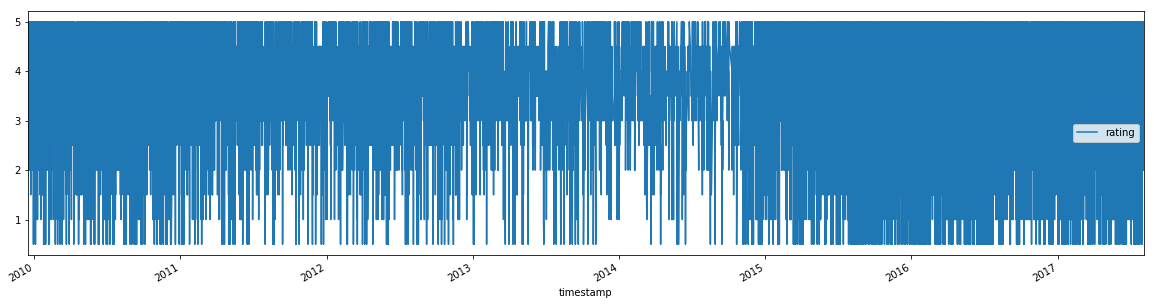

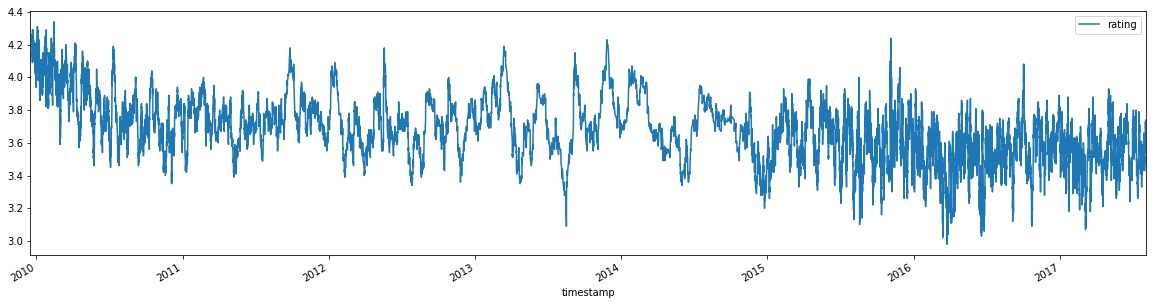

In [49]:
for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')
for_plot.plot()
pd.rolling_mean(for_plot, 50).plot()

In [53]:
n = 140607

metadata[metadata.id==n]

adult                              belongs_to_collection     budget  \
26555  False  {'id': 10, 'name': 'Star Wars Collection', 'po...  245000000   

                                                  genres  \
26555  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                                homepage      id    imdb_id  \
26555  http://www.starwars.com/films/star-wars-episod...  140607  tt2488496   

      original_language                original_title  \
26555                en  Star Wars: The Force Awakens   

                                                overview    ...      \
26555  Thirty years after defeating the Galactic Empi...    ...       

      release_date       revenue runtime  \
26555   2015-12-15  2.068224e+09   136.0   

                               spoken_languages    status  \
26555  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                             tagline                         title  video  \
26555  Every generation has a story.  Star Wars: The Force Awakens  False   

      vote_average vote_count  
26555          7.5     7993.0  

[1 rows x 24 columns]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=50).mean()


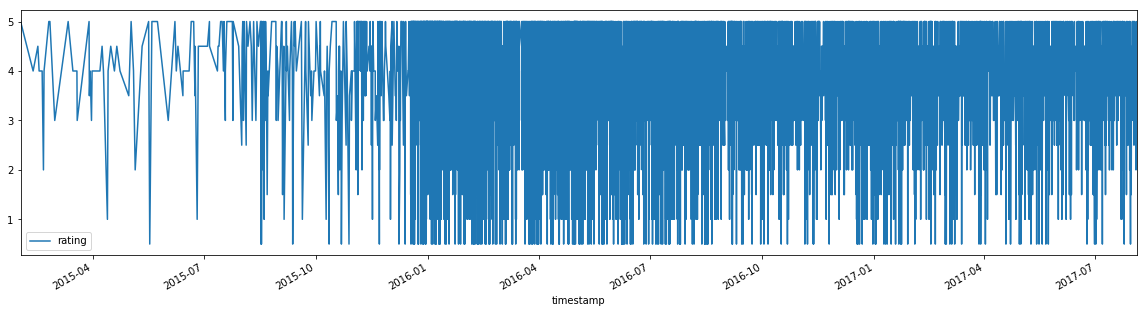

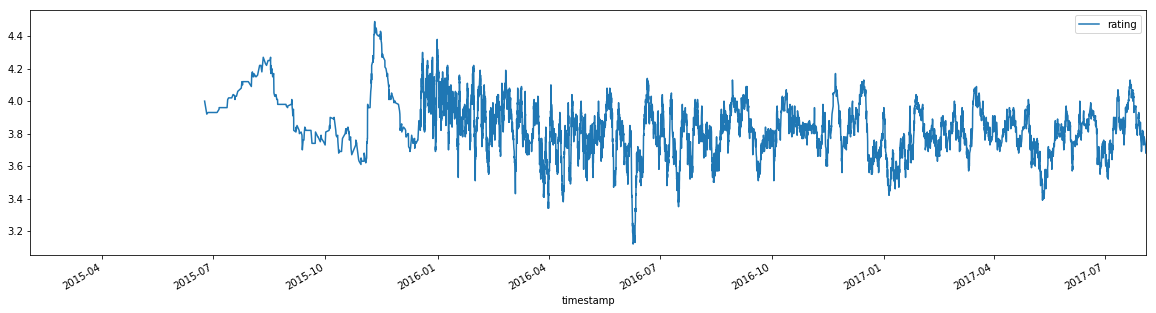

In [54]:
for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')
for_plot.plot()
pd.rolling_mean(for_plot, 50).plot()

In [55]:
n = 597

metadata[metadata.id==n]

adult belongs_to_collection     budget  \
1639  False                   NaN  200000000   

                                                 genres  \
1639  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   

                         homepage   id    imdb_id original_language  \
1639  http://www.titanicmovie.com  597  tt0120338                en   

     original_title                                           overview  \
1639        Titanic  84 years later, a 101-year-old woman named Ros...   

        ...     release_date       revenue runtime  \
1639    ...       1997-11-18  1.845034e+09   194.0   

                                       spoken_languages    status  \
1639  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   

                                        tagline    title  video vote_average  \
1639  Nothing on Earth could come between them.  Titanic  False          7.5   

     vote_count  
1639     7770.0  

[1 rows x 24 columns]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=100).mean()


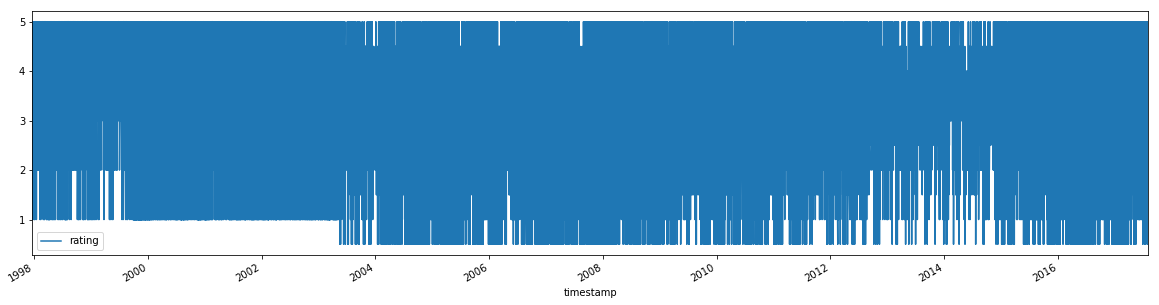

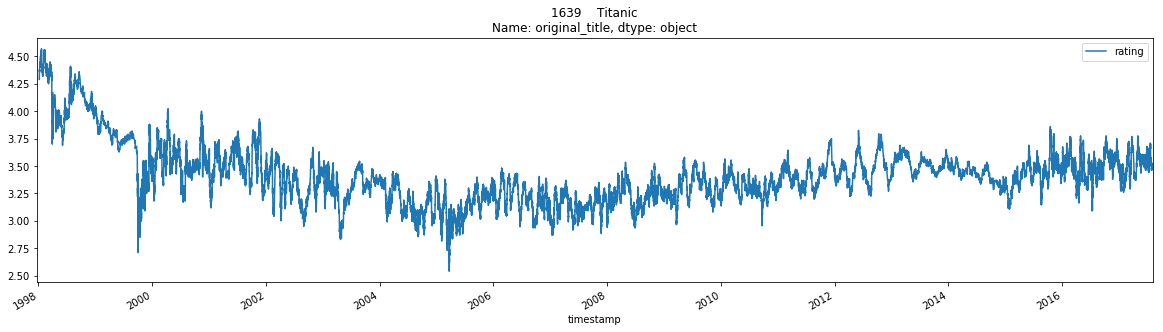

In [95]:
n=597

for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')
for_plot.plot()
pd.rolling_mean(for_plot, 100).plot(title=str(metadata[metadata.id==n].original_title))

In [79]:
np.array(metadata[metadata.revenue>1000000000].sort_values('revenue', ascending=False).id)

array([ 19995, 140607,    597,  24428, 135397, 168259,  99861,  12445,
       109445, 321612, 337339,  68721, 211672, 271110,  38356,    122,
        37724,  91314,  49026,  10193,     58, 330459,   1865, 127380,
        12155, 269149,  49051, 324852,    155])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=50).mean()
//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


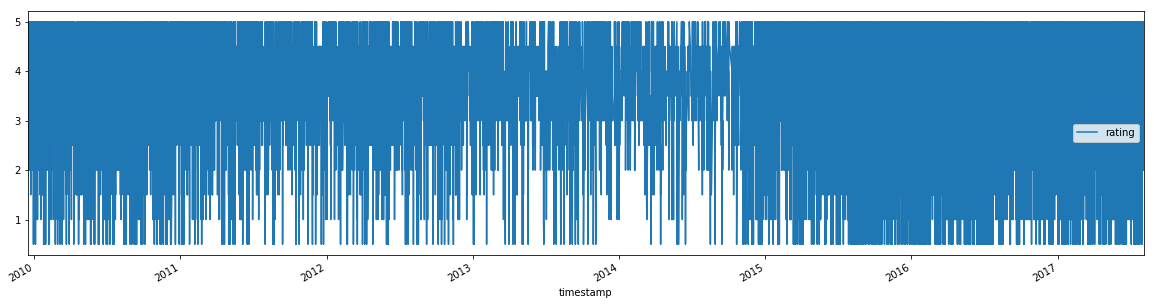

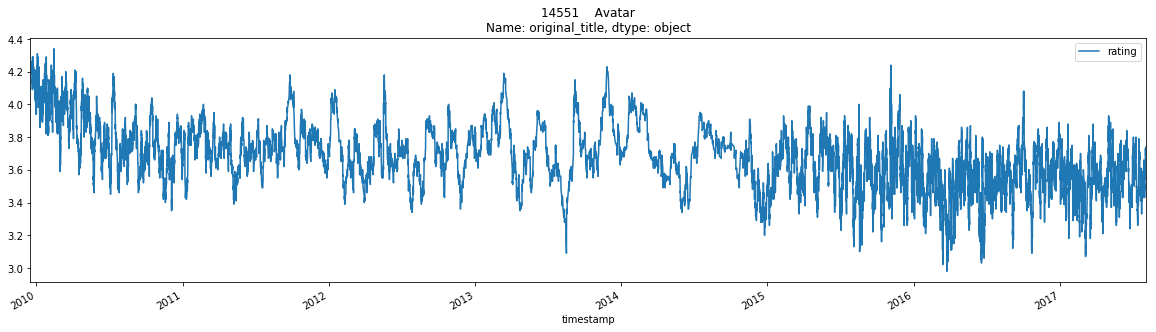

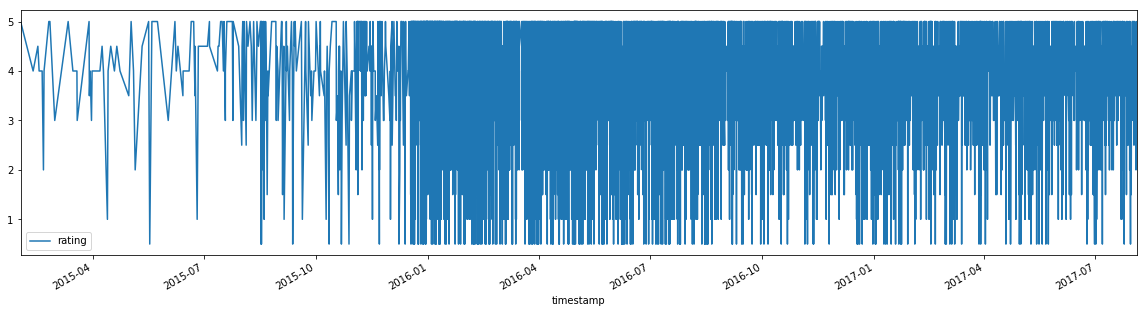

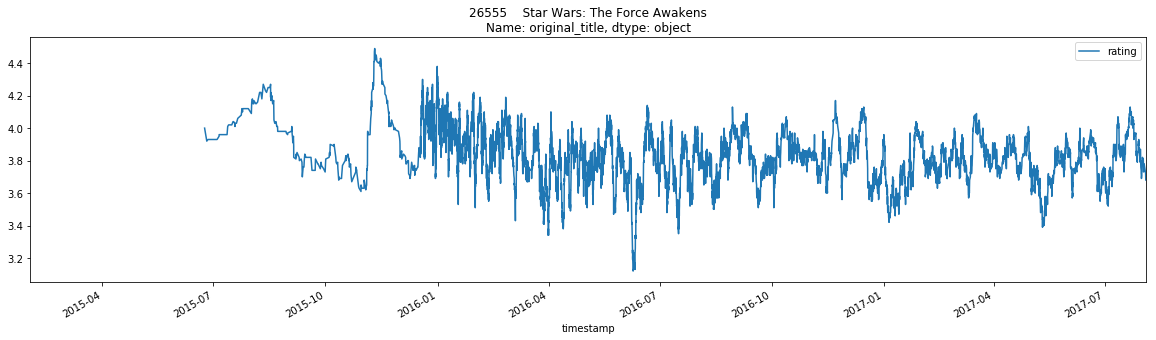

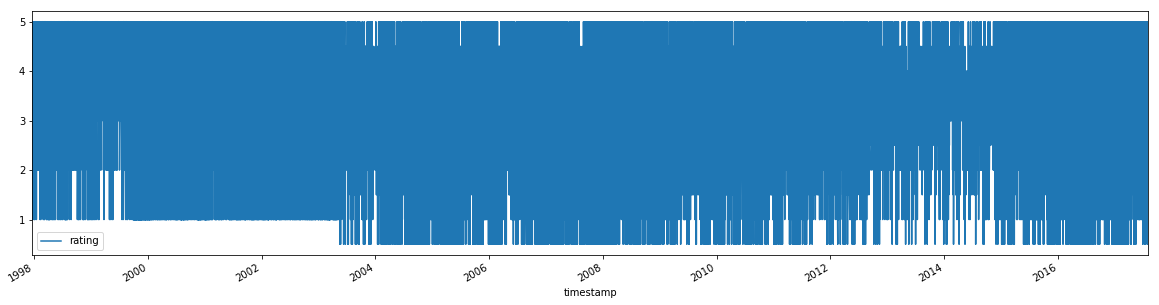

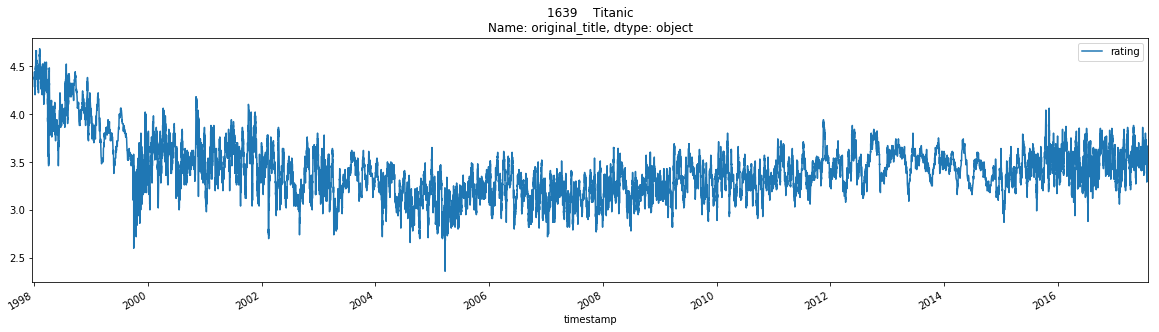

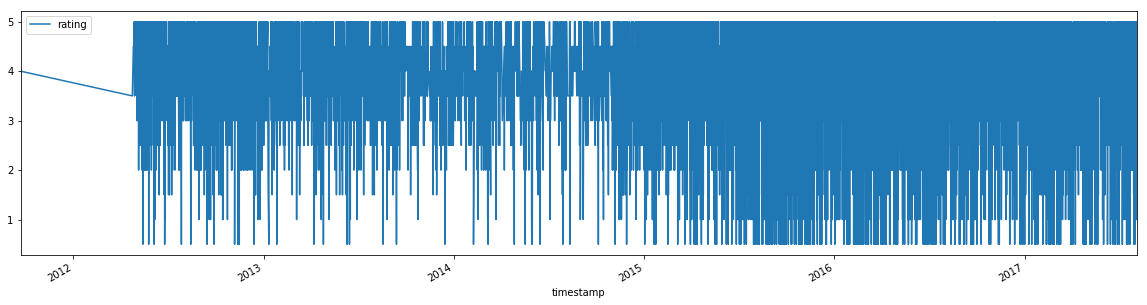

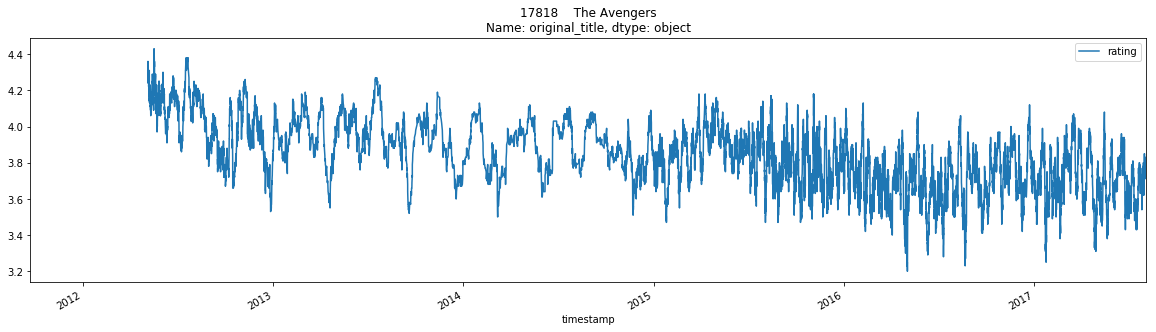

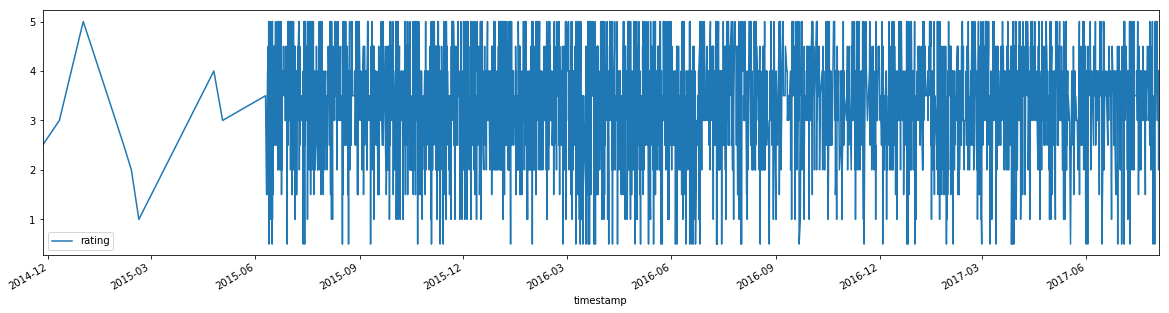

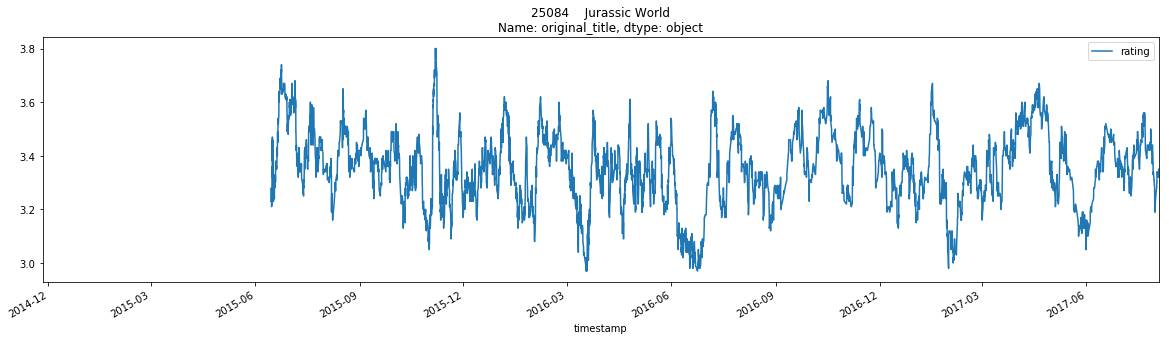

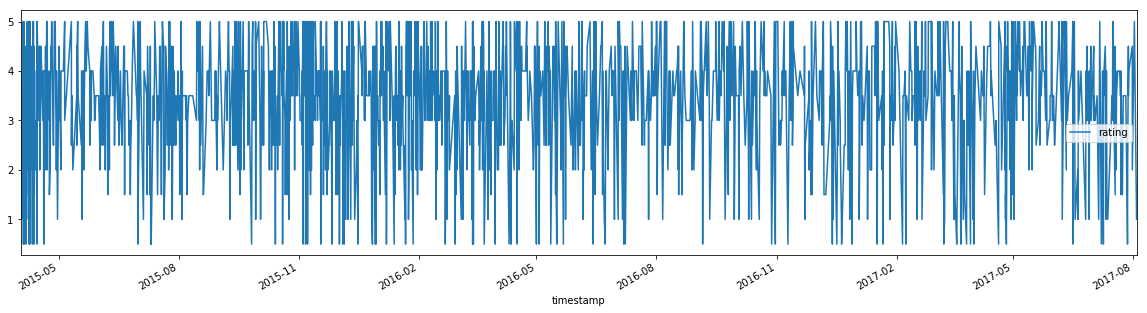

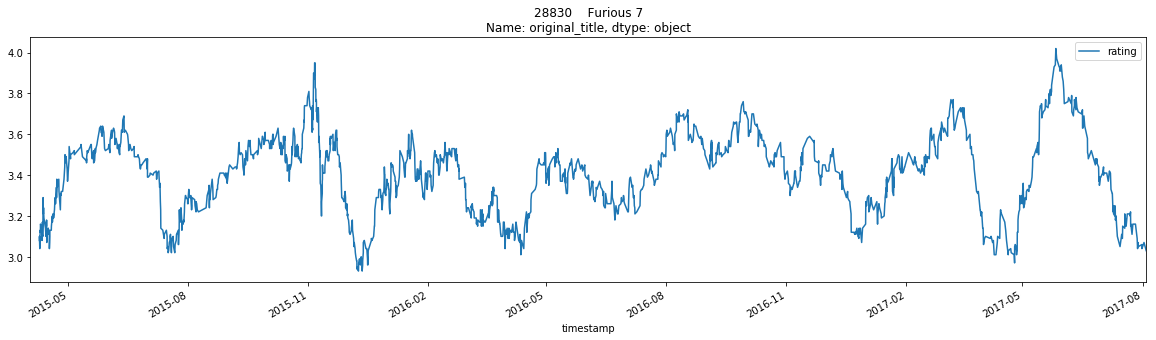

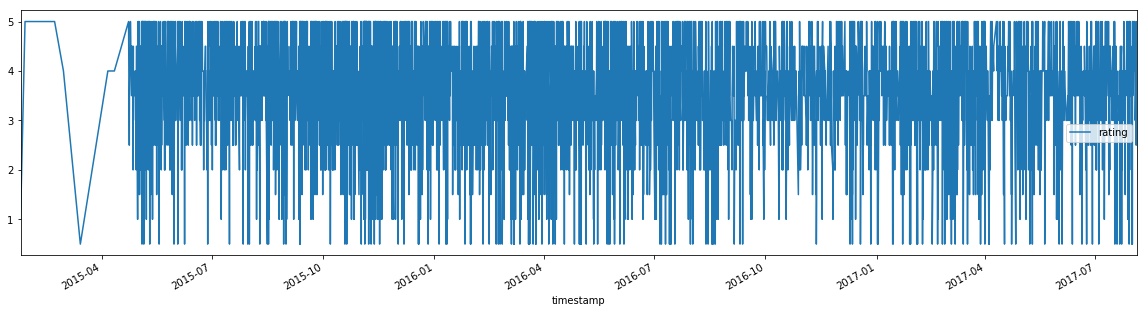

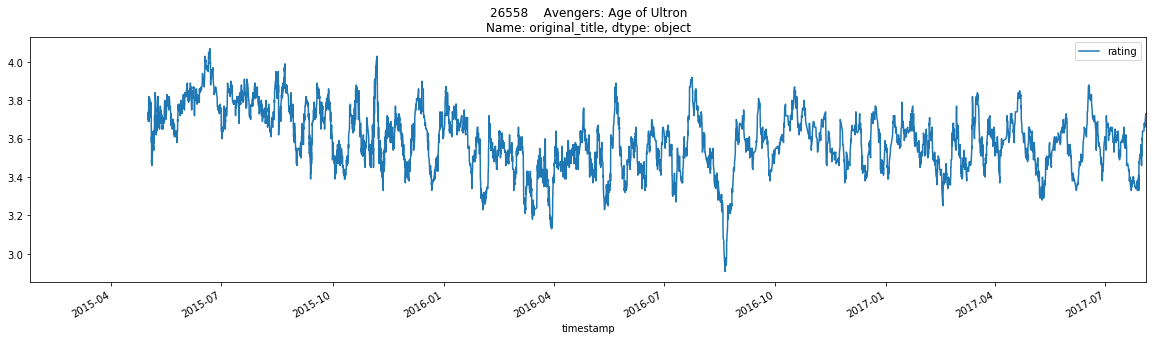

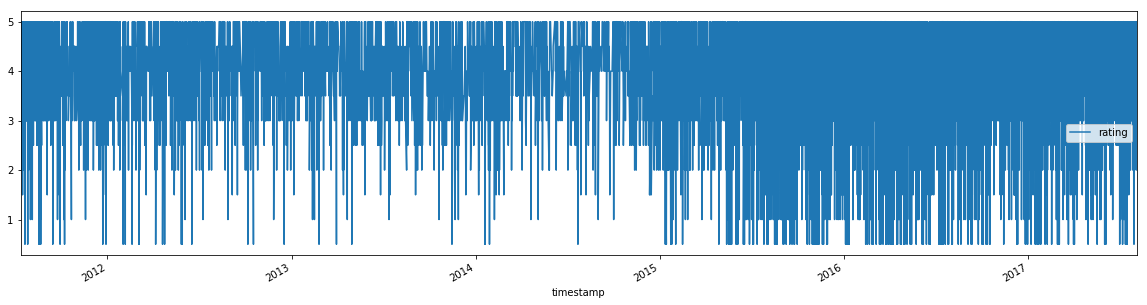

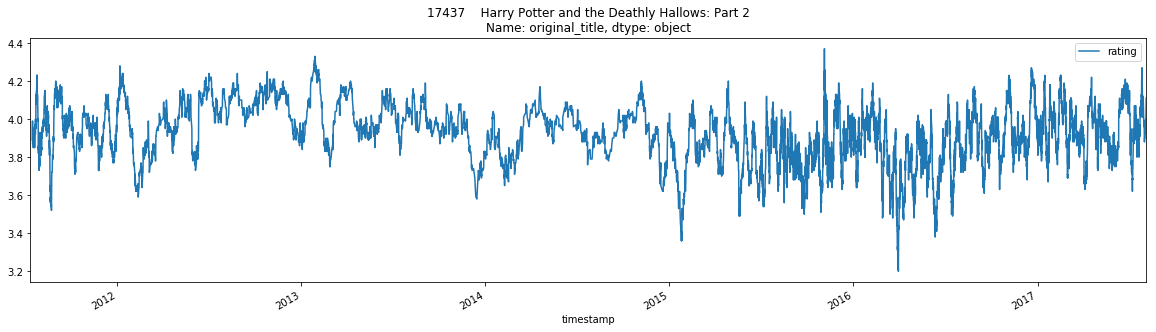

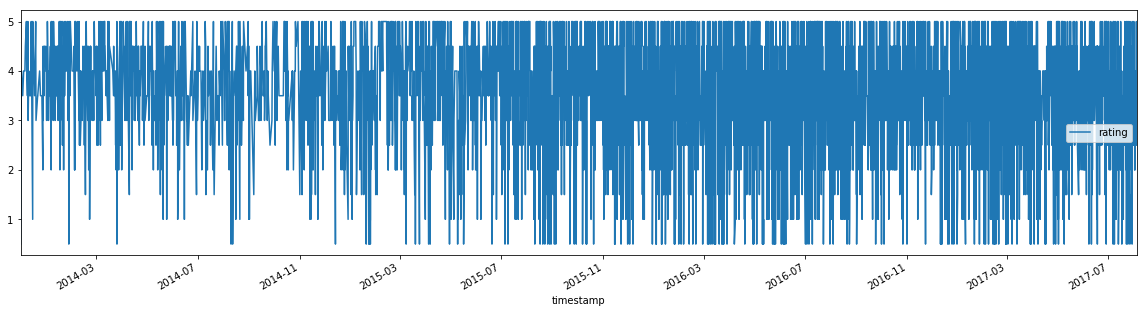

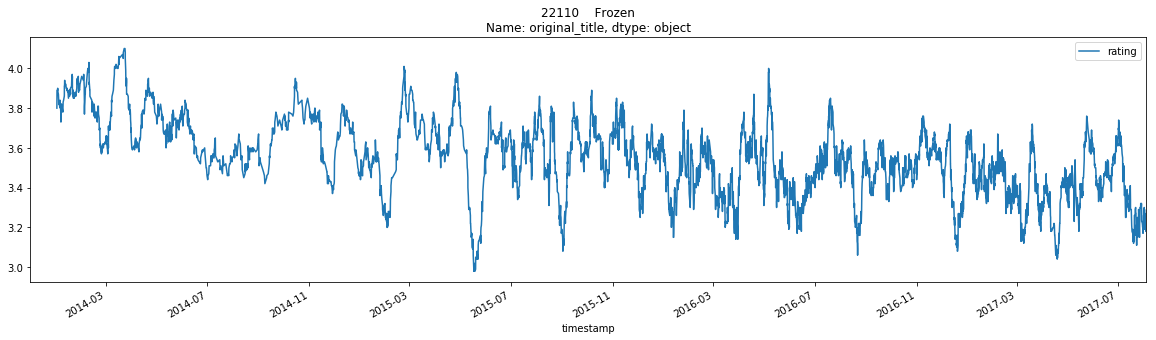

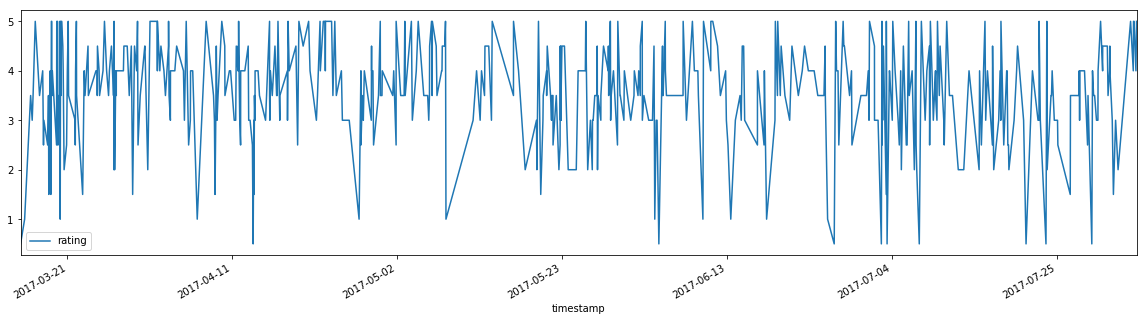

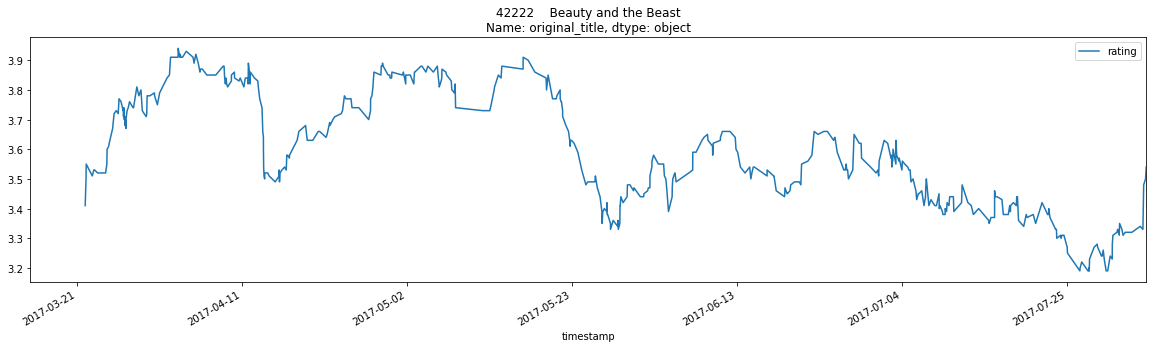

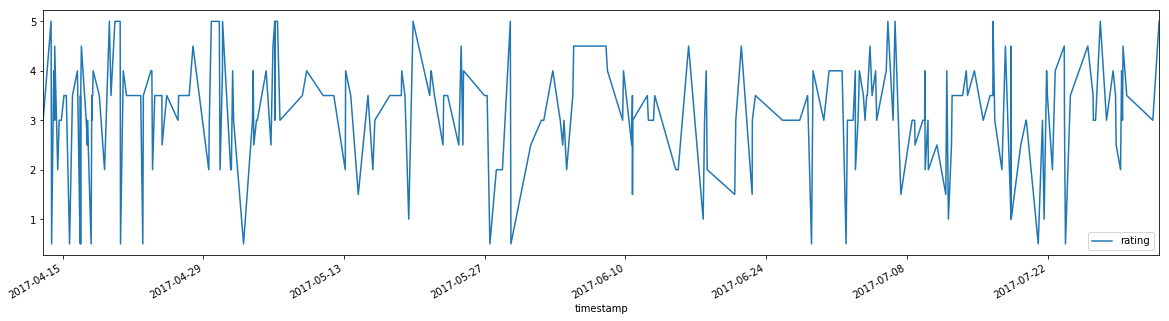

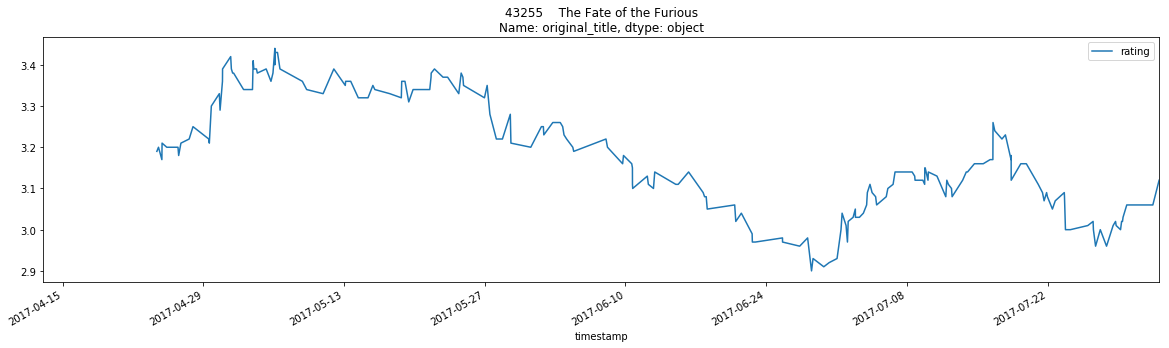

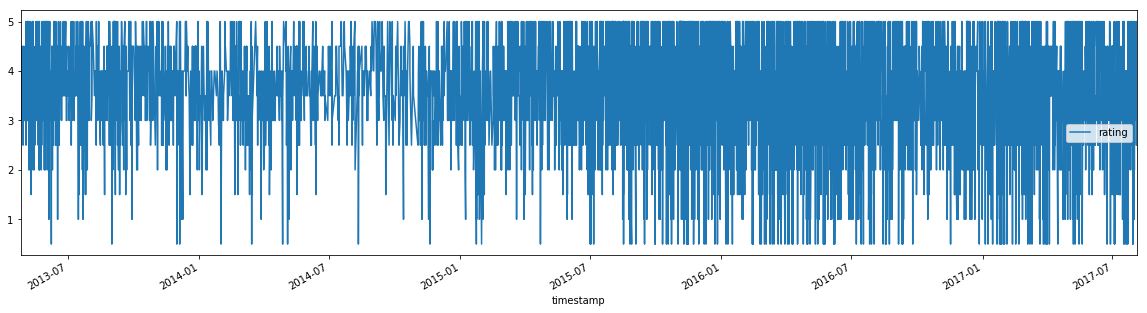

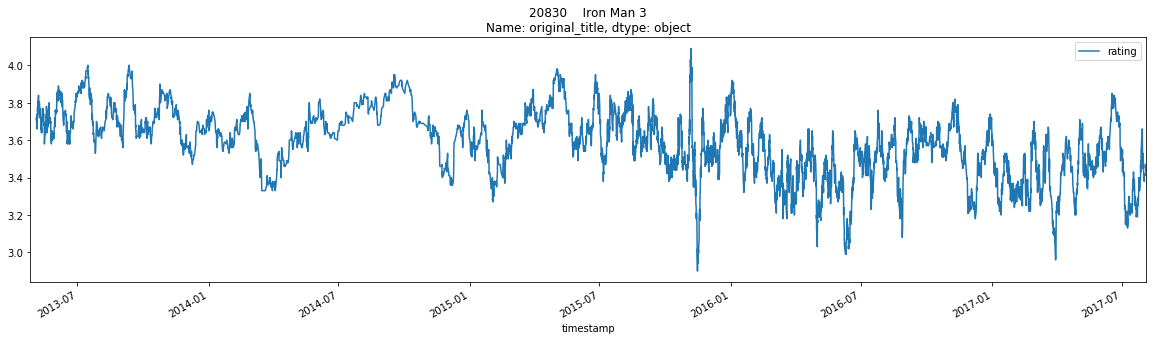

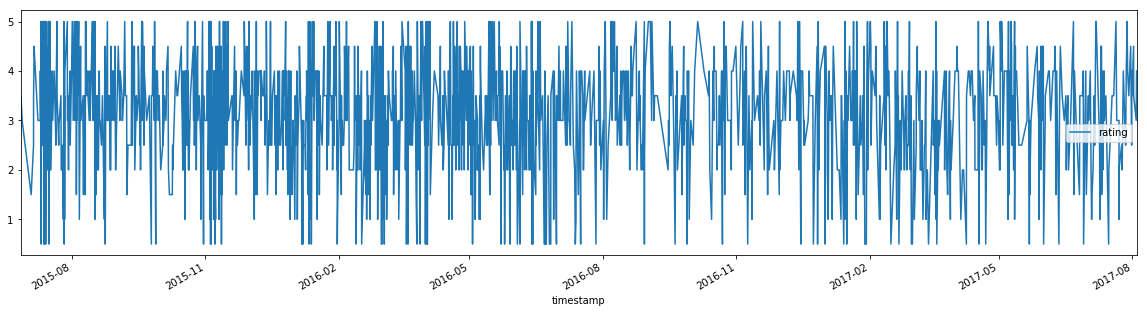

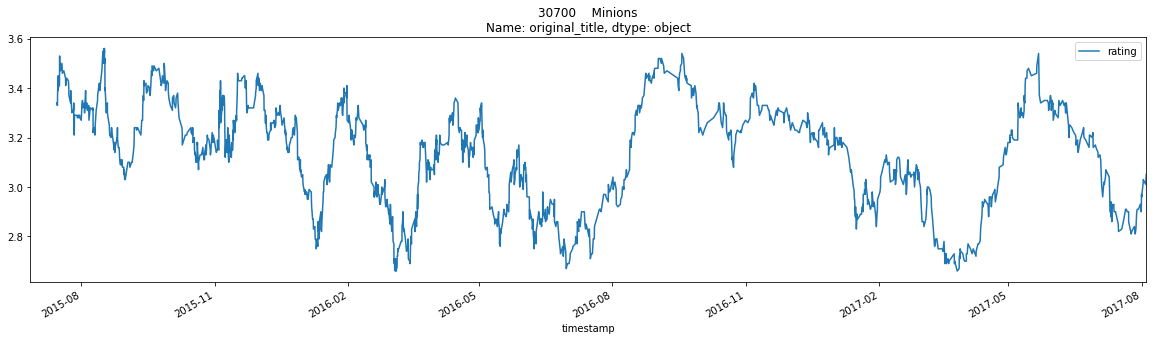

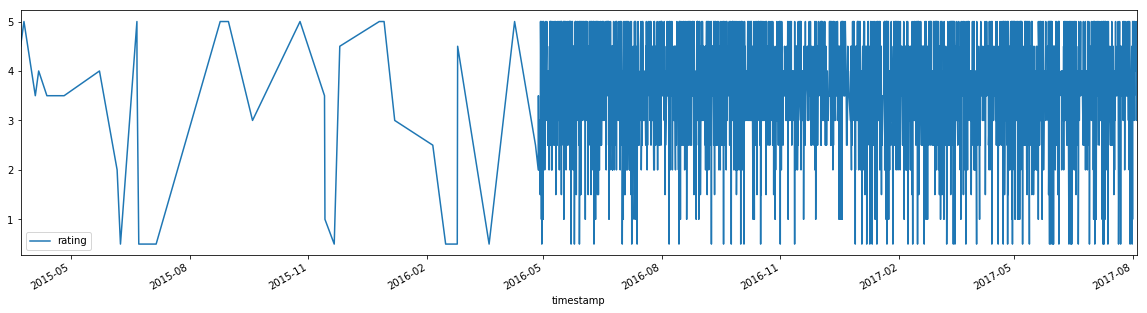

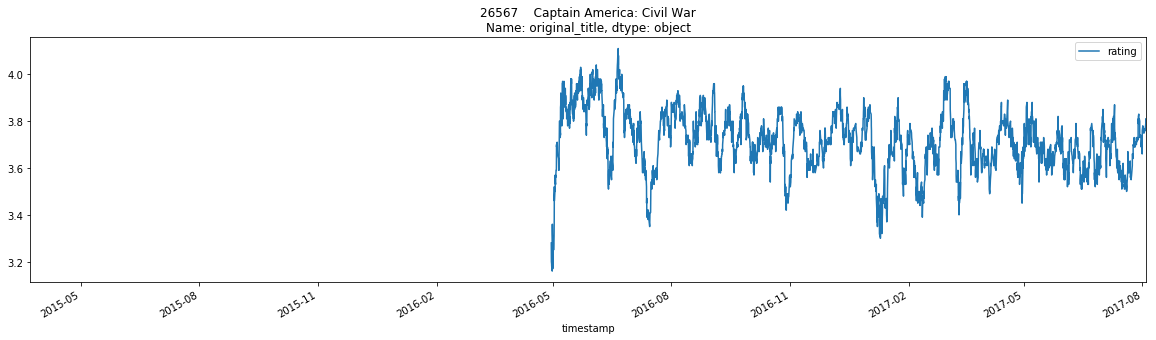

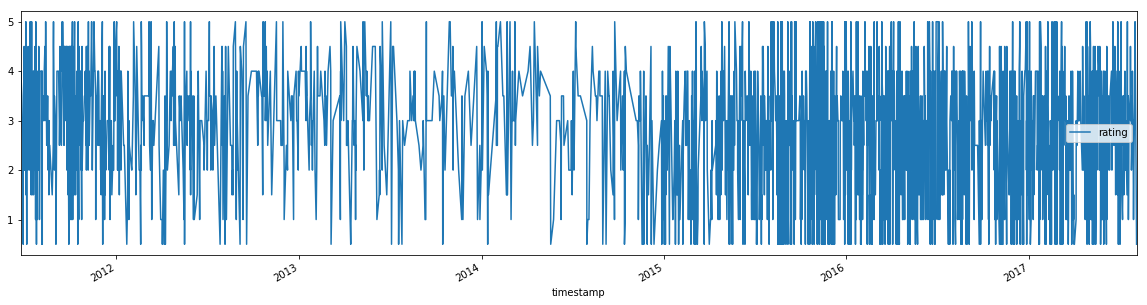

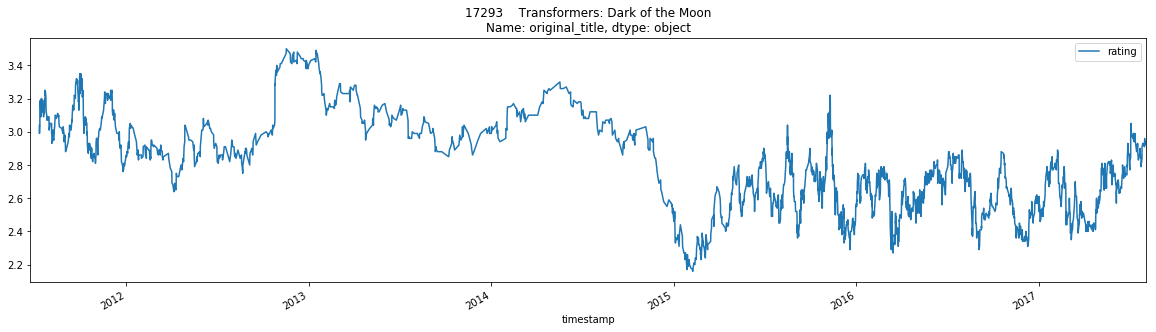

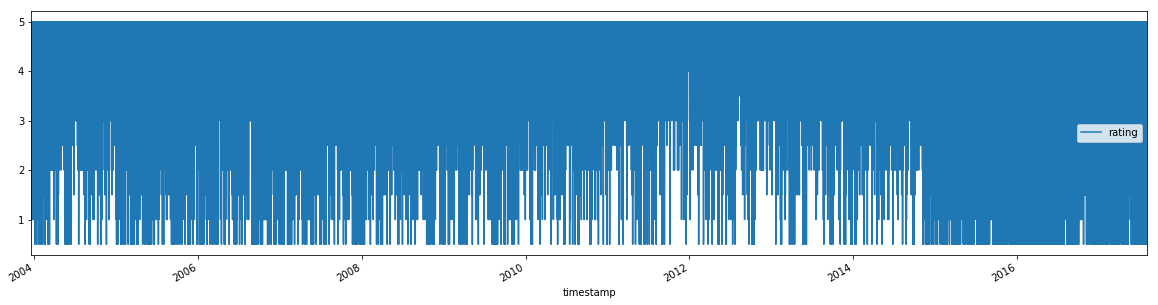

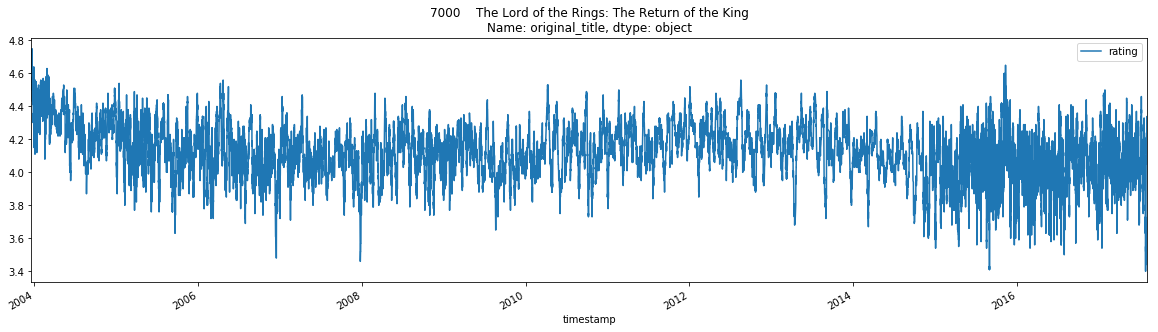

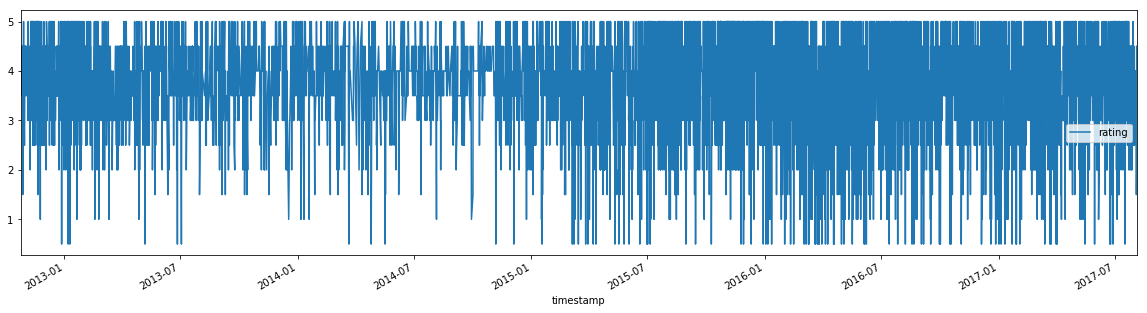

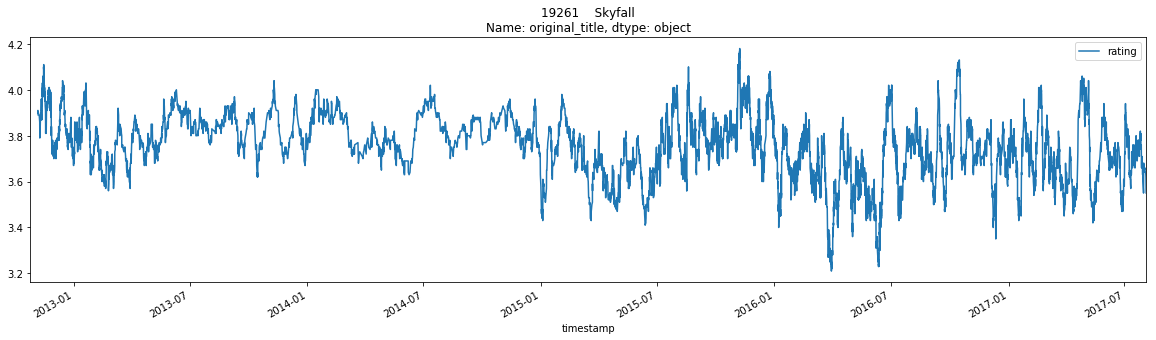

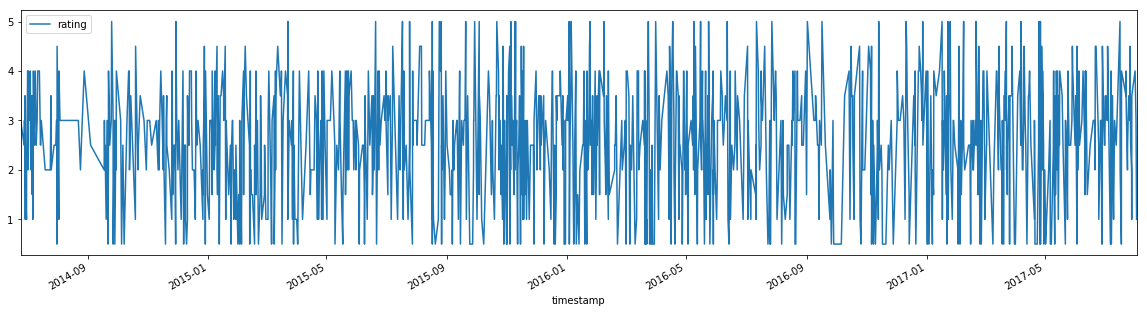

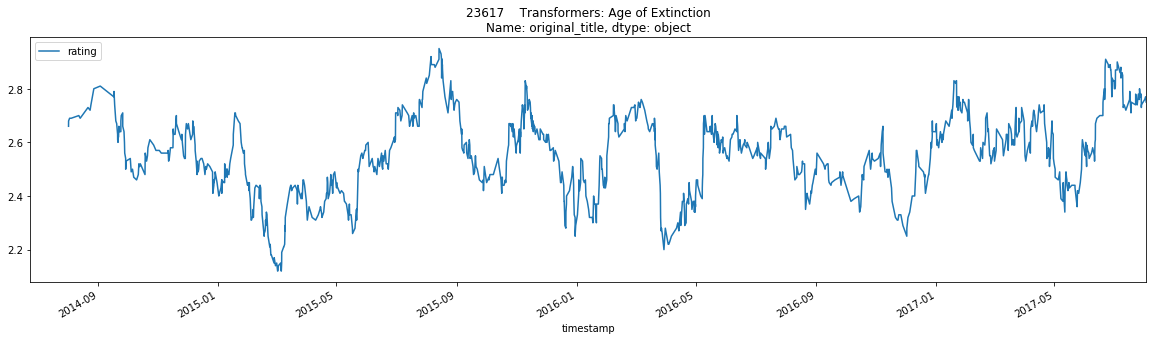

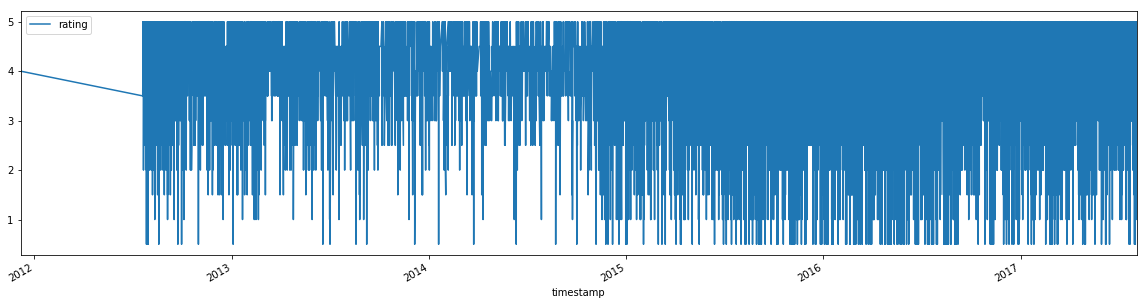

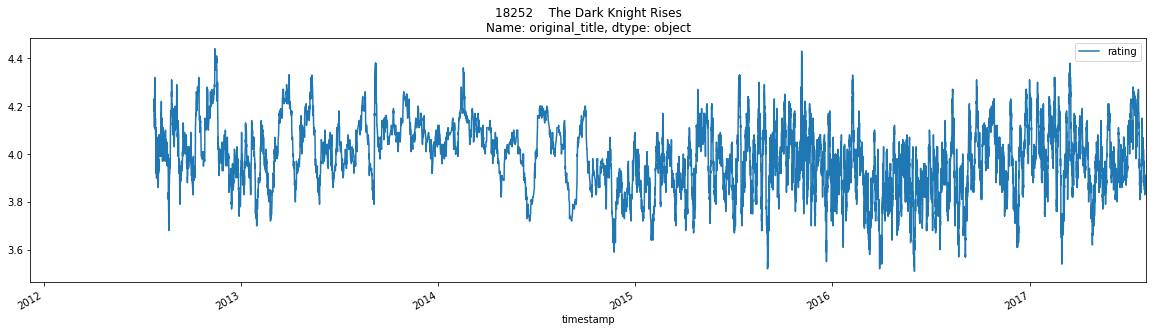

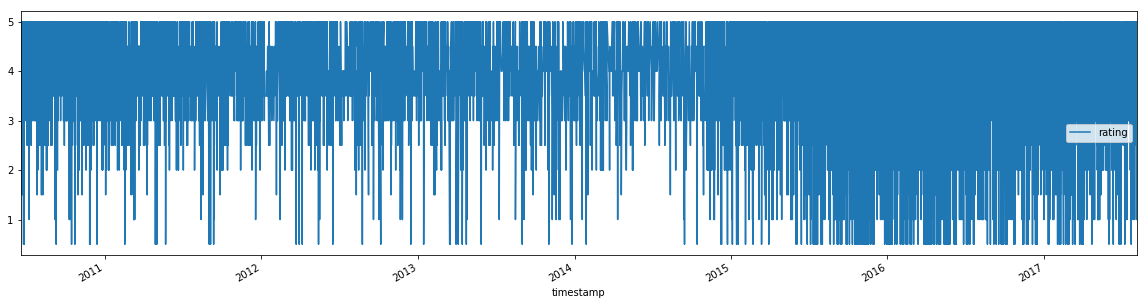

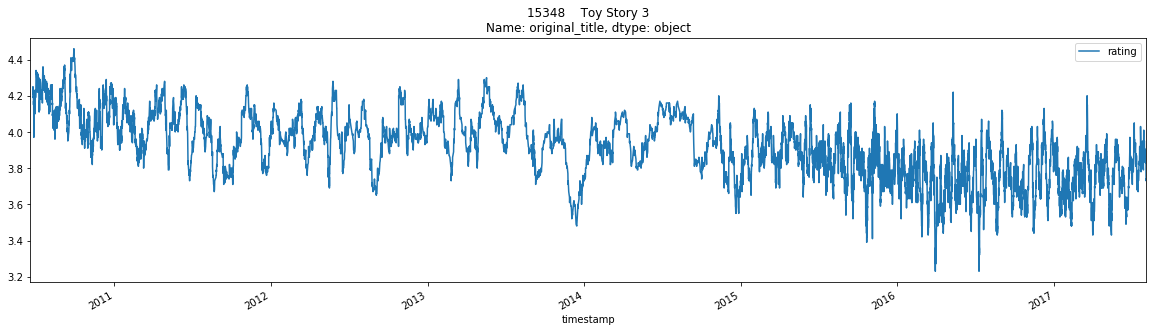

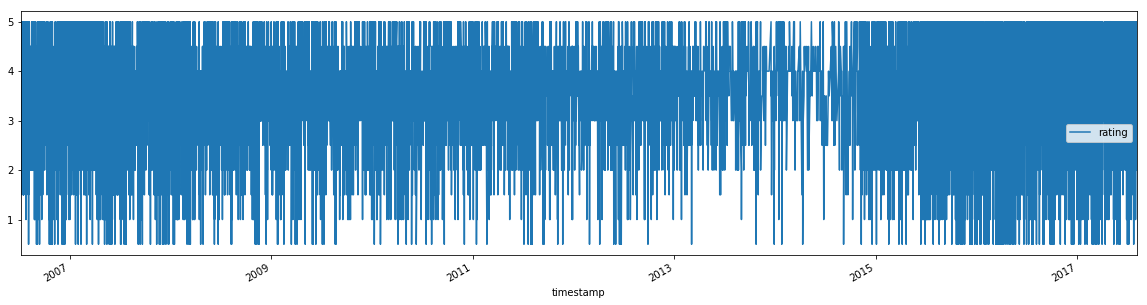

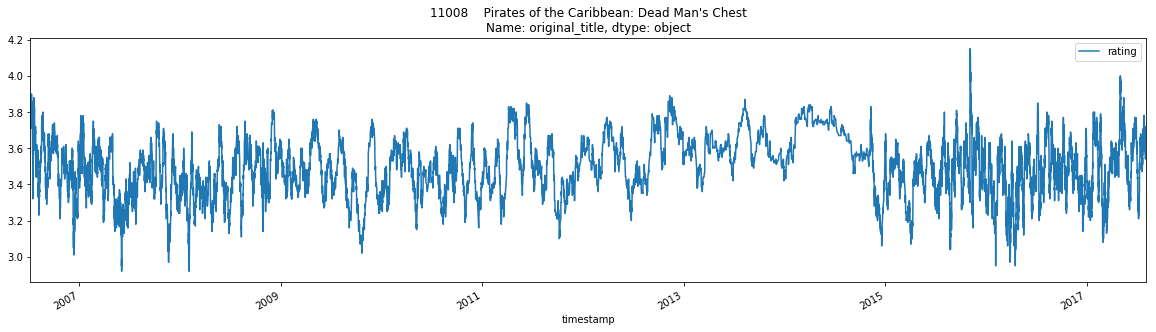

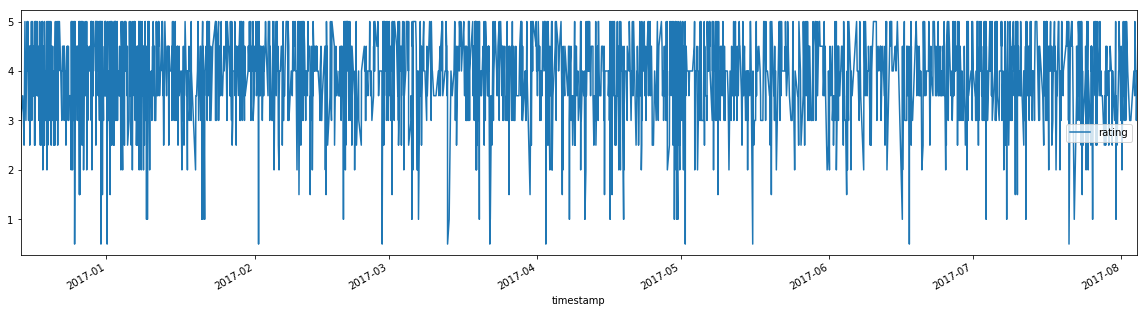

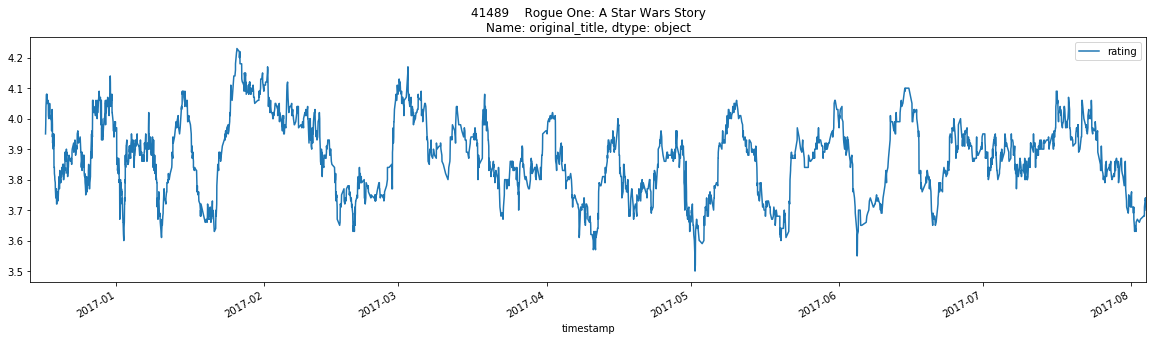

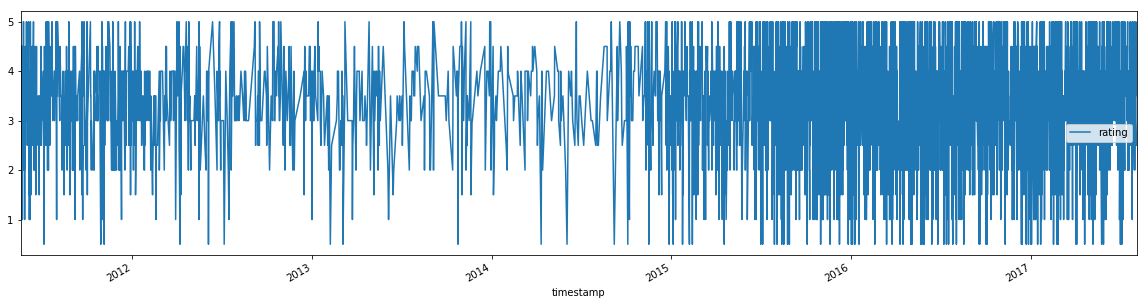

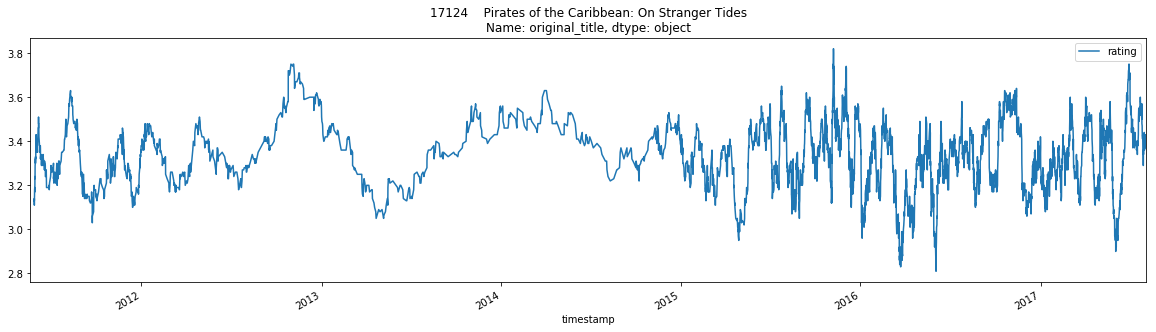

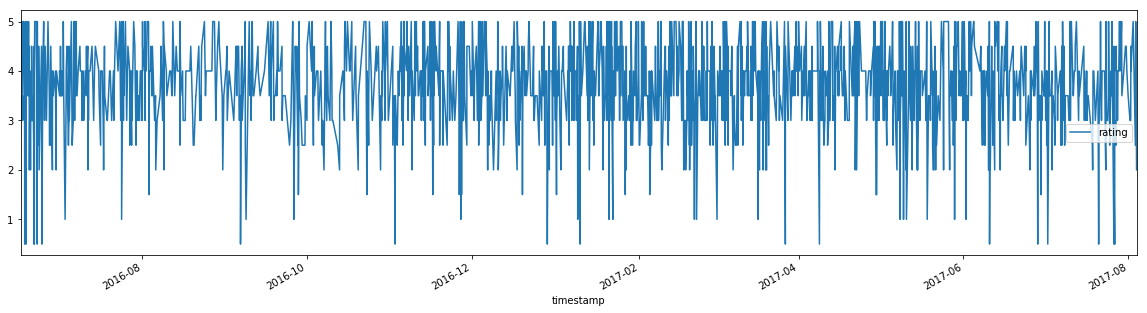

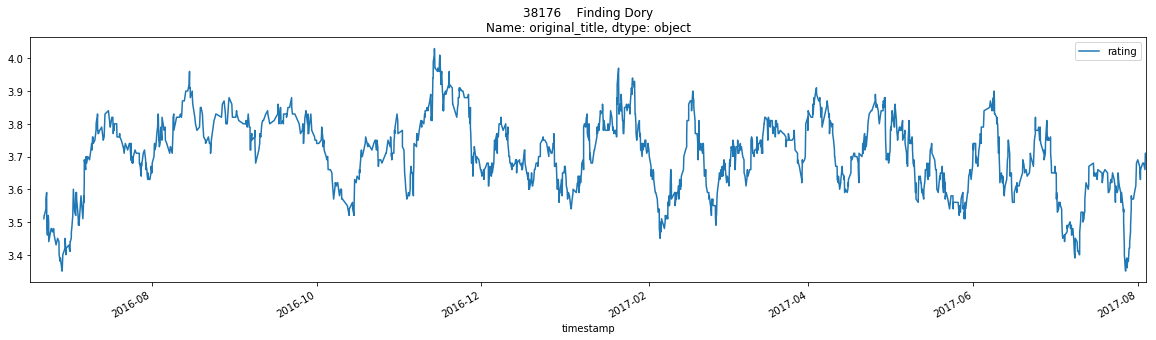

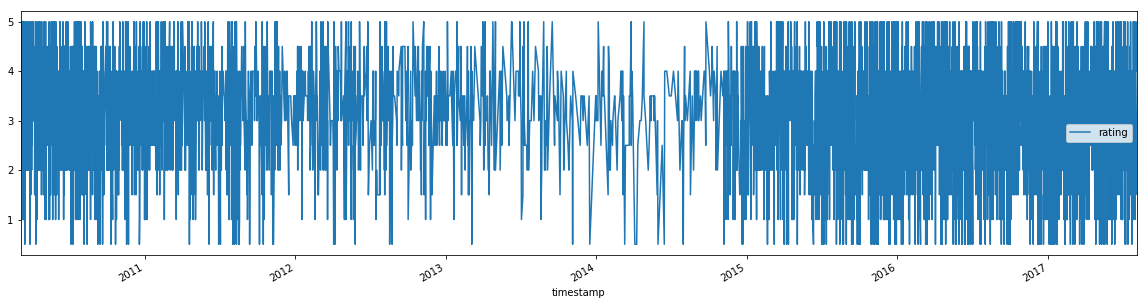

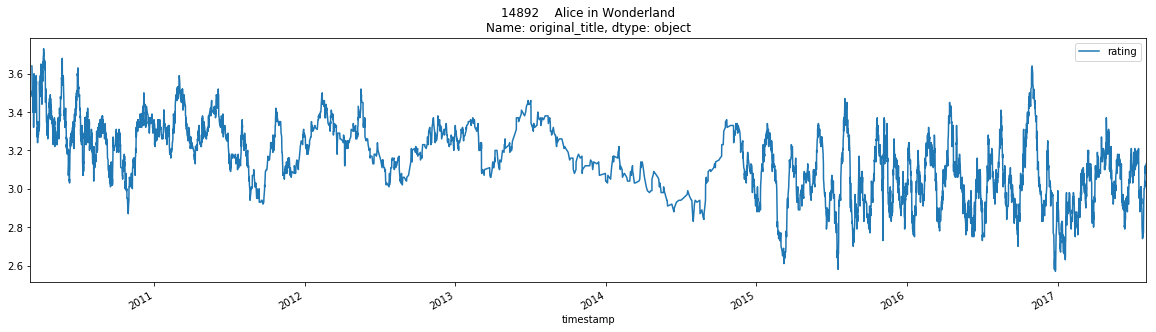

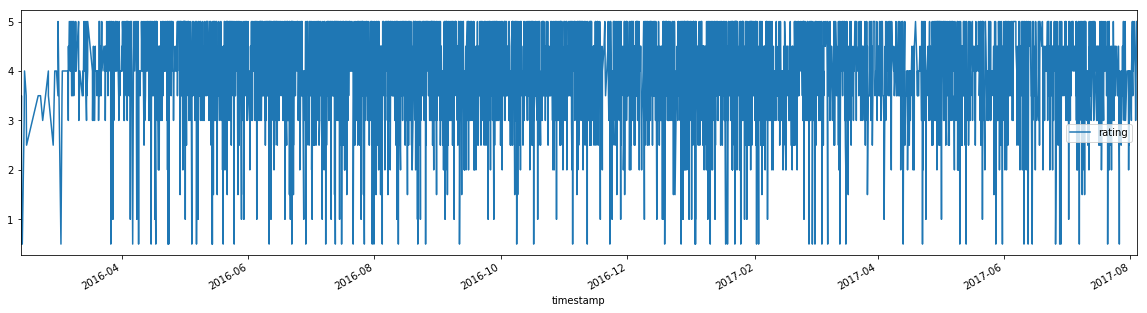

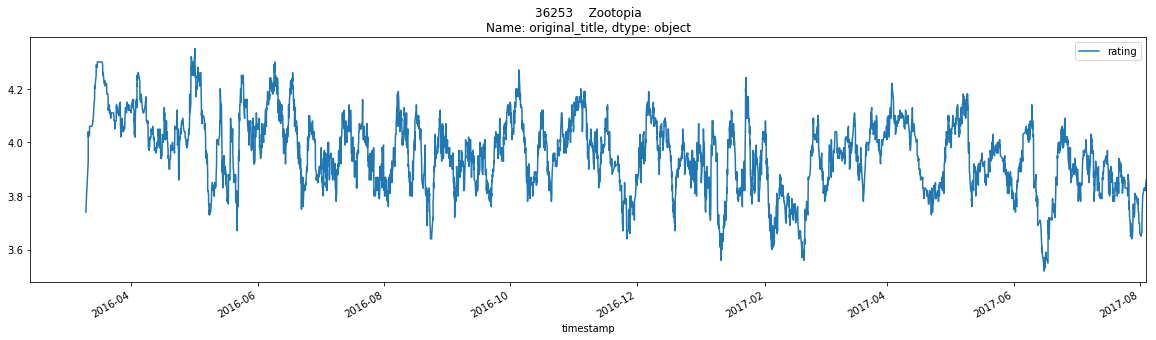

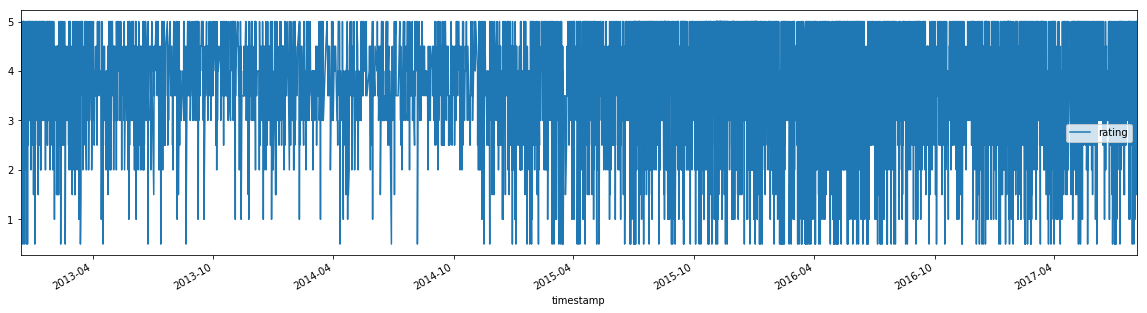

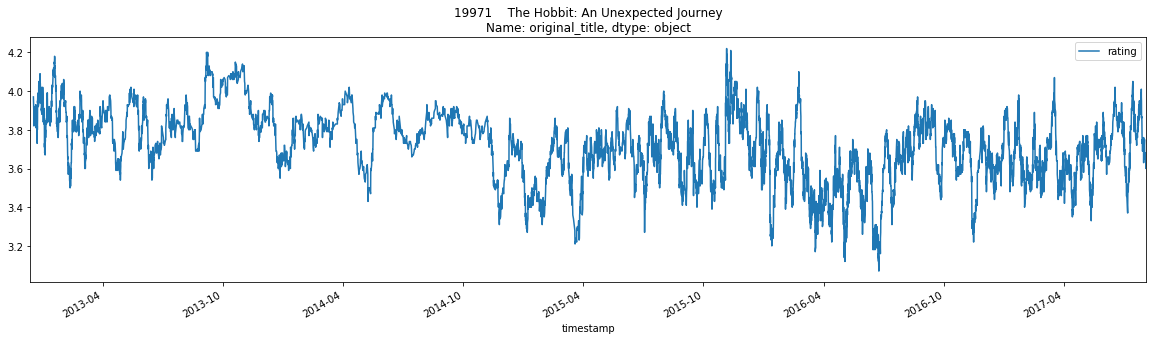

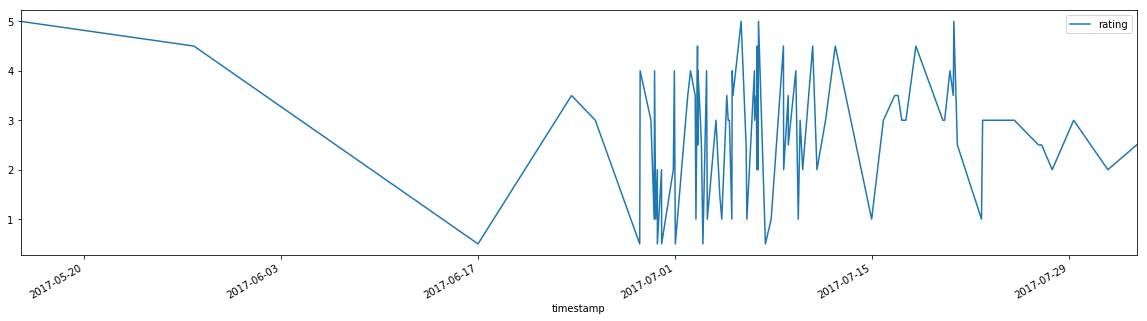

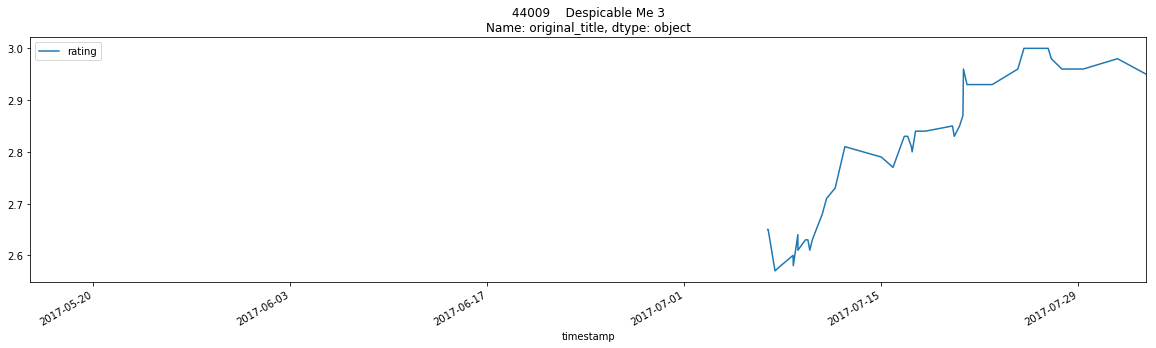

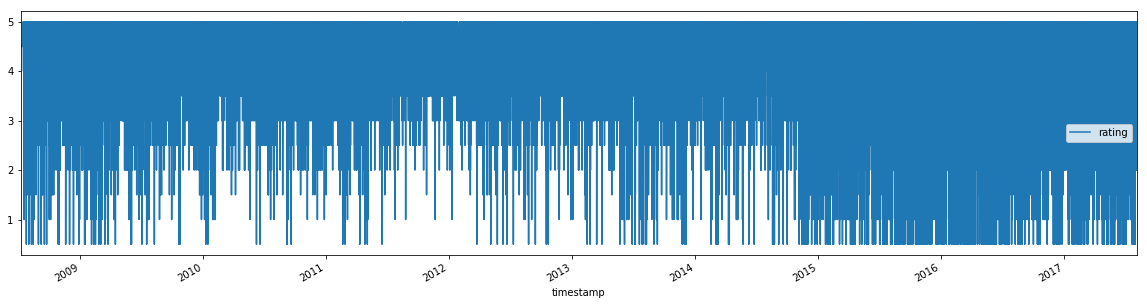

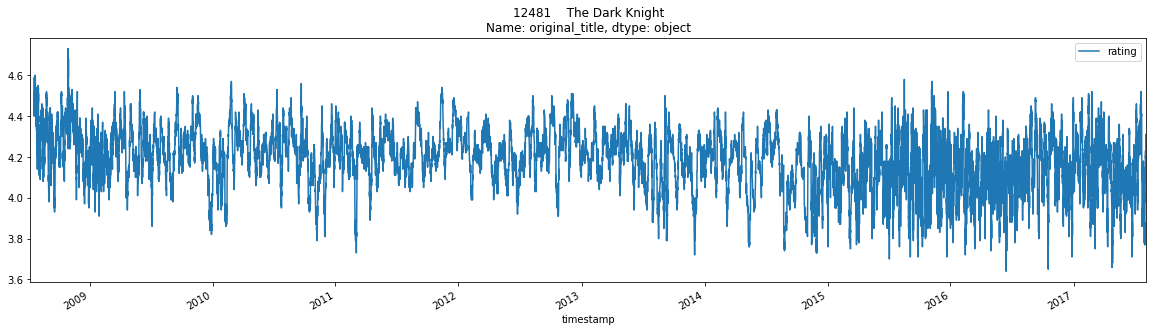

In [80]:
for n in np.array(metadata[metadata.revenue>1000000000].sort_values('revenue', ascending=False).id):
    for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
    for_plot = for_plot.set_index('timestamp')
    for_plot.plot()
    pd.rolling_mean(for_plot, 50).plot(title=str(metadata[metadata.id==n].original_title))

In [81]:
movies[movies.movieId==356]

movieId                title                    genres  imdbId  tmdbId
352      356  Forrest Gump (1994)  Comedy|Drama|Romance|War  109830    13.0

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=50).mean()


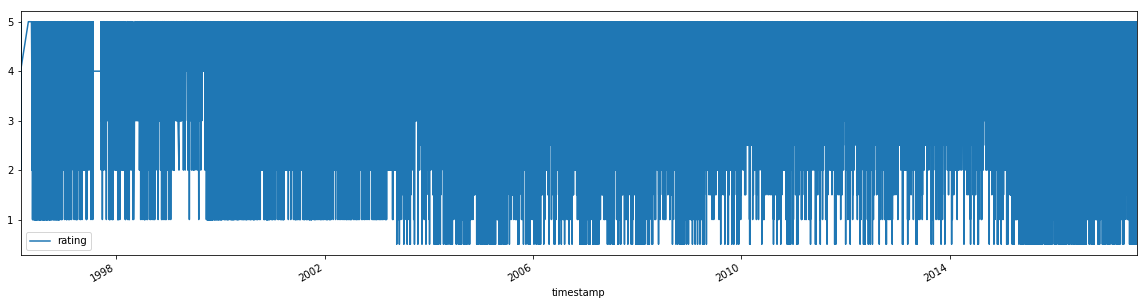

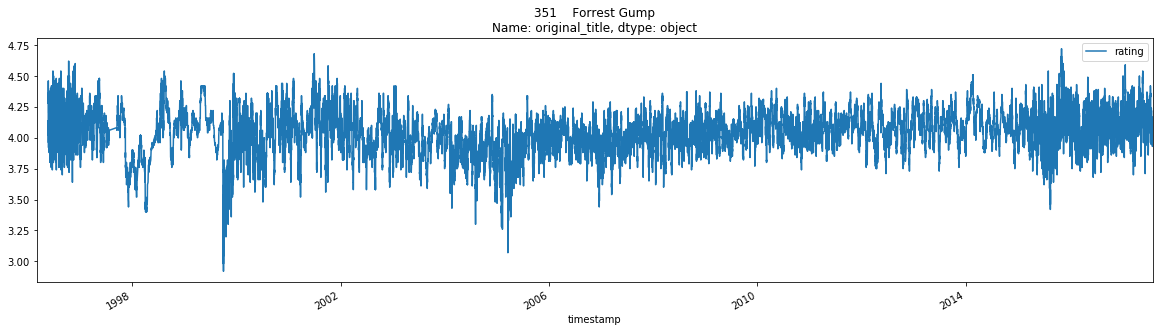

In [83]:
n = 13

for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')
for_plot.plot()
pd.rolling_mean(for_plot, 50).plot(title=str(metadata[metadata.id==n].original_title))

***

こっちは指数移動平均

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,span=100,ignore_na=False,min_periods=0).mean()


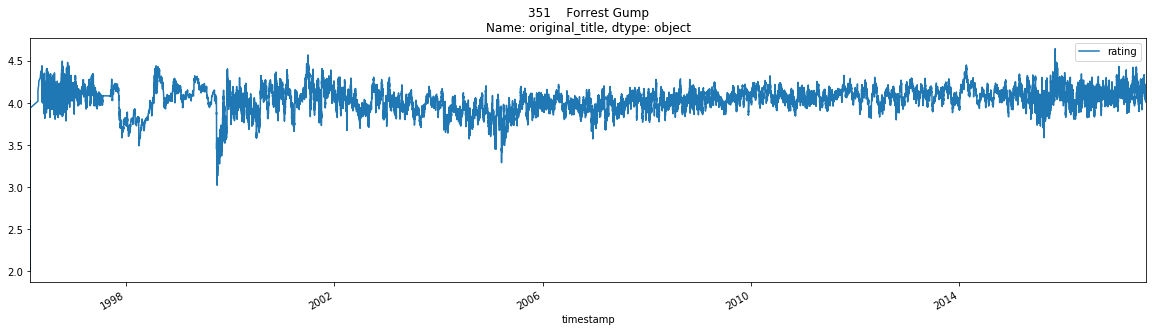

In [87]:
n = 13

for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')
pd.ewma(for_plot, span=100).plot(title=str(metadata[metadata.id==n].original_title))

In [88]:
movies[movies.movieId==318]

movieId                             title       genres  imdbId  tmdbId
315      318  Shawshank Redemption, The (1994)  Crime|Drama  111161   278.0

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,span=100,ignore_na=False,min_periods=0).mean()


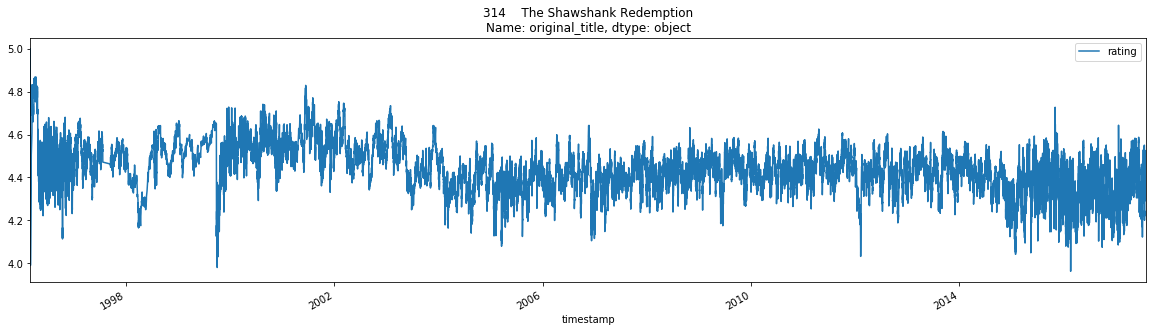

In [89]:
n = 278

for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')
pd.ewma(for_plot, span=100).plot(title=str(metadata[metadata.id==n].original_title))

In [90]:
movies[movies.movieId==159817]

movieId                title       genres  imdbId    tmdbId
39432   159817  Planet Earth (2006)  Documentary  795176  192040.0

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,span=50,ignore_na=False,min_periods=0).mean()


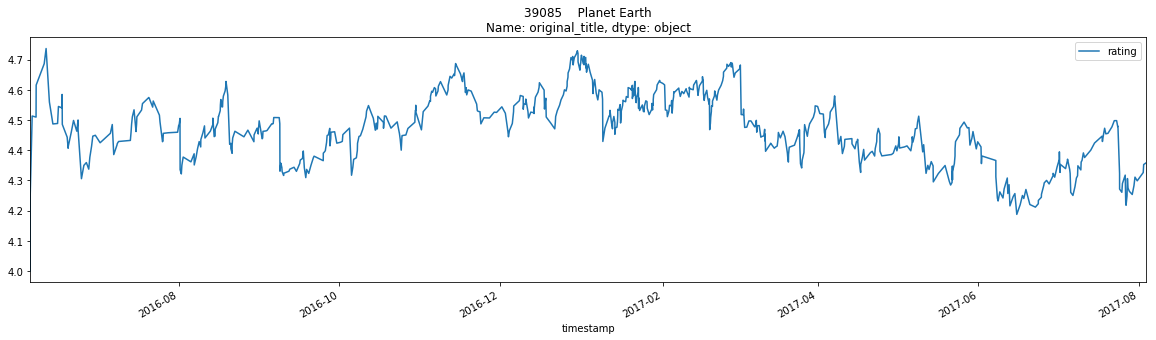

In [92]:
n = 192040

for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
for_plot = for_plot.set_index('timestamp')
pd.ewma(for_plot, span=50).plot(title=str(metadata[metadata.id==n].original_title))

***

## 時系列の傾向を回帰

In [100]:
for_plot.index

DatetimeIndex(['1997-12-19 19:57:55', '1997-12-21 02:31:41',
               '1997-12-21 20:55:41', '1997-12-22 00:58:32',
               '1997-12-22 11:25:19', '1997-12-22 19:57:11',
               '1997-12-23 00:55:00', '1997-12-23 01:04:56',
               '1997-12-23 10:41:45', '1997-12-23 14:58:20',
               ...
               '2017-08-02 07:30:47', '2017-08-03 12:03:52',
               '2017-08-03 16:05:07', '2017-08-03 17:29:11',
               '2017-08-03 19:22:22', '2017-08-04 01:00:38',
               '2017-08-04 02:04:56', '2017-08-04 02:31:26',
               '2017-08-04 04:06:29', '2017-08-04 05:07:37'],
              dtype='datetime64[ns]', name='timestamp', length=42558, freq=None)

In [102]:
n = 278

from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = for_plot.index
Y = for_plot.rating.to_frame()

l_model = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

clf = l_model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

# 偏回帰係数
print(pd.DataFrame({"Name":X.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 
print(clf.intercept_)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 21279]

In [ ]:
for n in np.array(metadata[metadata.revenue>10000000].sort_values('revenue', ascending=False).id):
    for_plot = ratings[ratings.tmdbId==n].sort_values('timestamp')[['timestamp', 'rating']]
    for_plot = for_plot.set_index('timestamp')

***

In [34]:
before_released[before_released['movieId'].isin(list(before_released_count[before_released_count.userId>30].index))].groupby('movieId').mean()

userId    rating        id       revenue  runtime     imdbId
movieId                                                                     
605      131156.903846  4.153846    7300.0  9.752955e+07    108.0   117247.0
608      124443.200000  4.654545     275.0  6.061198e+07     98.0   116282.0
660      131354.323529  2.529412  161070.0  0.000000e+00     94.0   115591.0
673      146692.865248  3.851064    2300.0  2.502000e+08     88.0   117705.0
692      147402.152941  2.670588   29621.0  0.000000e+00     94.0   117688.0
723      133124.645161  3.290323  131232.0  0.000000e+00     86.0    92123.0
742      142773.069767  3.302326   10280.0  0.000000e+00     92.0   117894.0
747      145522.572193  3.454545   16299.0  0.000000e+00     94.0   117768.0
802      152293.575758  3.696970    9294.0  1.520364e+08    123.0   117333.0
832      143196.914286  3.657143    3595.0  3.094927e+08    117.0   117438.0
835      131939.125000  3.097222   18555.0  2.582630e+05    102.0   116353.0
839      144082.500000  3.812500   10546.0  1.791729e+07     84.0   115986.0
842      140760.705882  3.147059    9431.0  5.600000e+06     87.0   117826.0
895      126705.276923  2.976923   79782.0  0.000000e+00    110.0   105729.0
981      150327.695652  2.782609   52855.0  3.028094e+06     95.0   118927.0
987      128202.000000  3.258065   63945.0  2.940640e+05    103.0   118742.0
1115     142502.186047  2.953488  141210.0  0.000000e+00      6.0   114472.0
1355     141166.743590  3.897436    2212.0  1.179002e+06    102.0   119791.0
1445     143699.623188  3.333333   14908.0  4.529843e+06    108.0   119640.0
1598     137429.857143  2.976190    9458.0  0.000000e+00    100.0   118966.0
2027     148084.461538  3.307692    9835.0  1.900000e+07     84.0   120741.0
2028     124590.160714  4.196429     857.0  4.818409e+08    169.0   120815.0
2058     131881.545455  3.545455    9631.0  4.454768e+07    140.0   120768.0
2059     132793.750000  2.767857    9820.0  0.000000e+00    127.0   120783.0
2107     140158.763636  2.472727   11675.0  5.504174e+07     86.0   120694.0
2223     139918.100000  3.000000  143750.0  0.000000e+00     18.0    18876.0
2679     141187.186441  2.737288   84198.0  0.000000e+00     84.0   124555.0
2891     135511.450549  3.487179   24066.0  1.943649e+06     98.0   162360.0
2894     131022.577068  2.786654  171982.0  0.000000e+00     27.0   194314.0
3052     153416.650000  3.750000    1832.0  3.065289e+07    130.0   120655.0
3081     133112.064516  3.548387    2668.0  2.060715e+08    105.0   162661.0
4249     123596.936709  2.329114  136558.0  0.000000e+00     88.0   246002.0
4484     132353.043290  3.692641  110428.0  1.158600e+05     95.0    94828.0
5485     126522.388889  3.375000   39141.0  2.891288e+06     78.0   271219.0
5527     145078.337349  3.337349   30072.0  1.011373e+07    102.0   256276.0
6159     141878.086957  3.565217   13132.0  0.000000e+00    108.0   299458.0
6617     132561.131579  3.736842    2055.0  6.829629e+07    139.0   316356.0
44864    131208.726316  3.263158    8998.0  1.336844e+07     88.0   436331.0
45440    144406.336842  3.015789    9786.0  0.000000e+00    102.0   364955.0
53953    119954.450980  3.411765    3021.0  9.467960e+07    104.0   450385.0
59590    152089.868421  3.631579   21182.0  0.000000e+00    107.0  1047007.0
63189    123594.984127  3.222222   16166.0  0.000000e+00     85.0  1124394.0
66385    128786.200000  3.380000   25405.0  0.000000e+00     77.0  1019454.0
74115    141004.375000  2.750000   31156.0  0.000000e+00     35.0  1472122.0
117895   128427.878049  3.817073  294254.0  3.112569e+08    132.0  4046784.0
122886   138113.320359  3.965569  140607.0  2.068224e+09    136.0  2488496.0
122888   130206.354839  3.177419  271969.0  9.406131e+07    125.0  2638144.0
122894   131868.687500  2.531250   76600.0  0.000000e+00      0.0  1630029.0
122896   129725.779221  3.581169  166426.0  7.941920e+08    129.0  1790809.0
122916   124510.811321  3.688679  284053.0  0.000000e+00      0.0  3501632.0
122918   130

In [39]:
len(before_released[before_released['movieId'].isin(list(before_released_count[before_released_count.userId>0].index))].groupby('movieId').mean())

1464

In [37]:
ratings.groupby('movieId').mean()

userId    rating     imdbId    tmdbId
movieId                                              
1        135121.043616  3.888157   114709.0     862.0
2        134877.953761  3.236953   113497.0    8844.0
3        136520.452733  3.175550   113228.0   15602.0
4        136249.536062  2.875713   114885.0   31357.0
5        135293.275855  3.079565   113041.0   11862.0
6        135444.238968  3.841764   113277.0     949.0
7        134685.315960  3.372105   114319.0   11860.0
8        135333.835634  3.129191   112302.0   45325.0
9        133741.574949  3.008365   114576.0    9091.0
10       134609.622426  3.431841   113189.0     710.0
11       135495.106444  3.660591   112346.0    9087.0
12       134161.555084  2.672179   112896.0   12110.0
13       135705.354189  3.326442   112453.0   21032.0
14       135223.612017  3.430807   113987.0   10858.0
15       135087.287040  2.727040   112760.0    1408.0
16       134862.371643  3.795511   112641.0     524.0
17       134813.329738  3.952227   114388.0    4584.0
18       136348.898358  3.409031   113101.0       5.0
19       134925.724641  2.633983   112281.0    9273.0
20       134107.089591  2.894071   113845.0   11517.0
21       134765.305093  3.572137   113161.0    8012.0
22       134457.386087  3.300608   112722.0    1710.0
23       135855.626147  3.157631   112401.0    9691.0
24       135899.308619  3.180375   114168.0   12665.0
25       135020.397660  3.667513   113627.0     451.0
26       136582.373011  3.614058   114057.0   16420.0
27       135462.635676  3.424865   114011.0    9263.0
28       135557.015597  4.039876   114117.0   17015.0
29       134368.532990  3.920885   112682.0     902.0
30       133848.644280  3.636900   115012.0   37557.0
...                ...       ...        ...       ...
176205    35192.000000  3.000000  1489253.0   63266.0
176207    24217.000000  0.500000  1331329.0   45527.0
176211   134193.882353  3.764706  6969946.0  455661.0
176213    87865.000000  3.500000  3814486.0  327237.0
176215    77179.000000  1.500000    36975.0   84710.0
176217   258955.000000  5.000000   889600.0   39562.0
176219   142189.857143  2.857143   294425.0   14008.0
176221   189131.000000  2.500000   135690.0   44330.0
176223   189131.000000  4.000000      359.0   49279.0
176225   189131.000000  3.000000   135179.0   44333.0
176227   189131.000000  3.000000   135122.0   49277.0
176229   189131.000000  2.500000   127948.0   49271.0
176231   189131.000000  2.500000   135631.0   44324.0
176233   189131.000000  2.000000   224286.0  122036.0
176235   190507.000000  1.500000   457437.0   14885.0
176237   189131.000000  3.000000   135453.0   49280.0
176239   114470.000000  3.750000   135571.0  106807.0
176245   106988.000000  4.500000  3054038.0  276895.0
176249   106923.000000  3.500000  5690142.0  404604.0
176251   235828.000000  2.000000  4130180.0  420346.0
176253   107291.000000  4.500000    69215.0   67179.0
176255    77179.000000  2.000000    38621.0   84419.0
176257   189131.000000  3.000000   265736.0  390959.0
176259   189131.000000  3.500000   252966.0  289923.0
176263   189131.000000  2.000000   112613.0  222848.0
176267   189131.000000  4.000000   102797.0   30840.0
176269    97528.000000  3.500000  6209470.0  439050.0
176271      837.000000  5.000000  2028550.0  111109.0
176273   267799.000000  1.000000   303758.0   67758.0
176275   178373.000000  3.000000     8536.0  227506.0

[45115 rows x 4 columns]

In [45]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

***

In [155]:
a1 = len(metadata[pd.datetime.strptime('2010-01-01', '%Y-%m-%d') < metadata.release_date])

In [156]:
a = metadata[pd.datetime.strptime('2000-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('2010-01-01', '%Y-%m-%d') > a.release_date]
a2 = len(a)

In [157]:
a = metadata[pd.datetime.strptime('1990-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('2000-01-01', '%Y-%m-%d') > a.release_date]
a3 = len(a)

In [158]:
a = metadata[pd.datetime.strptime('1980-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('1990-01-01', '%Y-%m-%d') > a.release_date]
a4 = len(a)

In [159]:
a = metadata[pd.datetime.strptime('1970-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('1980-01-01', '%Y-%m-%d') > a.release_date]
a5 = len(a)

In [160]:
a = metadata[pd.datetime.strptime('1960-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('1970-01-01', '%Y-%m-%d') > a.release_date]
a6 = len(a)

In [161]:
a = metadata[pd.datetime.strptime('1950-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('1960-01-01', '%Y-%m-%d') > a.release_date]
a7 = len(a)

In [162]:
a = metadata[pd.datetime.strptime('1940-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('1950-01-01', '%Y-%m-%d') > a.release_date]
a8 = len(a)

In [163]:
a = metadata[pd.datetime.strptime('1930-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('1940-01-01', '%Y-%m-%d') > a.release_date]
a9 = len(a)

In [164]:
a = metadata[pd.datetime.strptime('1920-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('1930-01-01', '%Y-%m-%d') > a.release_date]
a10 = len(a)

In [165]:
a = metadata[pd.datetime.strptime('1910-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('1920-01-01', '%Y-%m-%d') > a.release_date]
a11 = len(a)

In [166]:
a = metadata[pd.datetime.strptime('1900-01-01', '%Y-%m-%d') < metadata.release_date]
a = a[pd.datetime.strptime('1910-01-01', '%Y-%m-%d') > a.release_date]
a12 = len(a)

In [167]:
a = metadata[pd.datetime.strptime('1900-01-01', '%Y-%m-%d') > metadata.release_date]
a13 = len(a)

In [168]:
count_year = ['before 1900', '1900-1910', '1910-1920', '1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', 'after 2010']

In [169]:
count_list = [a13, a12, a11, a10, a9, a8, a7, a6, a5, a4, a3, a2, a1]

In [172]:
count_merged = [count_year, count_list]

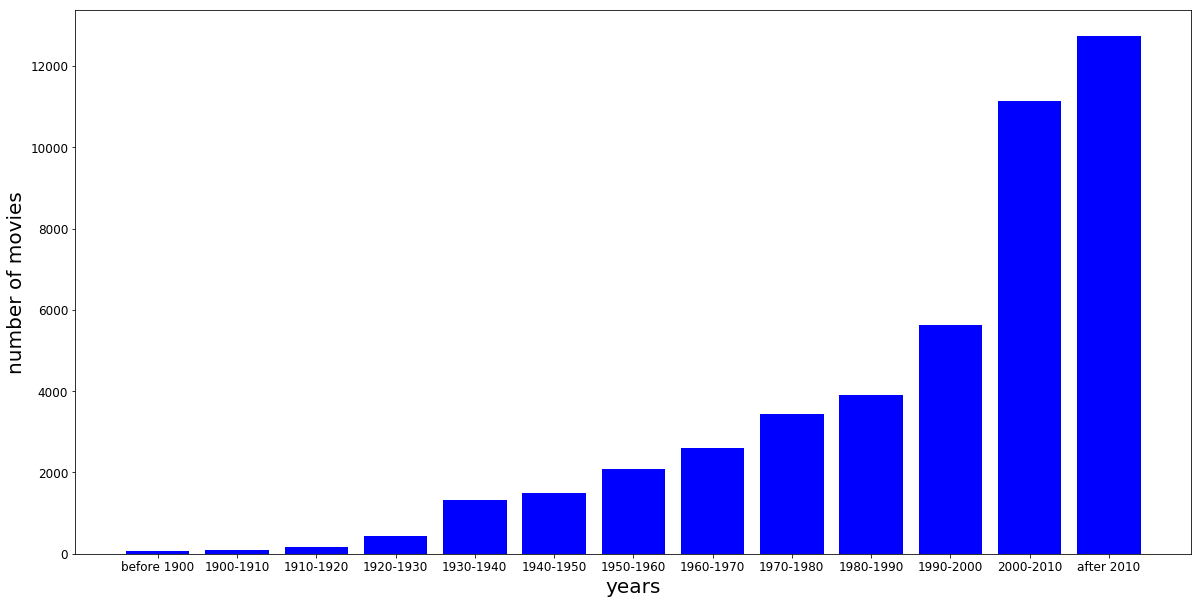

In [191]:
figsize(20, 10)
plt.bar(range(13), height=count_merged[1], color='b')
plt.xticks(range(13), count_year)
plt.xlabel('years', fontsize=20)
plt.ylabel('number of movies', fontsize=20)
plt.tick_params(labelsize=12)
plt.savefig('number_of_movies.jpg')